# EARTHQUAKE ANALYSİS

## Step 1: Data Cleaning and Preprocessing

### 1.1 Load the Dataset

In [1]:
import pandas as pd
import os

In [2]:
def load_and_concat_data(directory):
    """
    Verilen klasördeki tüm .txt dosyalarını okur ve tek bir DataFrame olarak birleştirir.
    
    Parametre:
    - directory (str): .txt dosyalarının bulunduğu klasörün yolu.
    
    Dönüş:
    - earthquake (DataFrame): Birleştirilmiş deprem verisi.
    """
    all_files = [f for f in os.listdir(directory) if f.endswith(".txt")]  # Sadece .txt dosyalarını al
    all_dataframes = []

    for file in all_files:
        file_path = os.path.join(directory, file)  # Dosyanın tam yolu
        df = pd.read_csv(file_path, delimiter="\t", encoding="mbcs", header=0, 
                         names=["ID", "Code", "Date", "Time", "Latitude", "Longtitude", 
                                "Depth(KM)", "xM", "MD", "ML", "Mw", "Ms", "Mb", "Type", "Location"])
        all_dataframes.append(df)  # Okunan DataFrame'i listeye ekle

    earthquake = pd.concat(all_dataframes, axis=0, ignore_index=True)  # Tüm DataFrame'leri birleştir
    return earthquake


In [3]:
# Kullanım:
earthquake = load_and_concat_data('./datasets')  # datasets klasöründeki tüm .txt dosyalarını birleştir

In [4]:
# Birleştirilmiş datamıza göz atalım
earthquake.sort_values(by='Code').reset_index(drop=True)

ID            Code        Date         Time  Latitude  Longtitude  \
0       3414  19990101020907  1999.01.01  02:09:07.30   40.2600     27.9000   
1       3413  19990101051232  1999.01.01  05:12:32.50   40.5200     28.2400   
2       3412  19990101113259  1999.01.01  11:32:59.60   40.4500     28.9900   
3       3411  19990101113609  1999.01.01  11:36:09.10   40.5500     28.2300   
4       3410  19990101150435  1999.01.01  15:04:35.80   40.7100     29.9600   
...      ...             ...         ...          ...       ...         ...   
397356     5  20241031204901  2024.10.31  20:49:01.17   38.3810     37.5788   
397357     4  20241031211939  2024.10.31  21:19:39.32   37.3898     36.9178   
397358     3  20241031222157  2024.10.31  22:21:57.89   37.9853     36.2907   
397359     2  20241031225941  2024.10.31  22:59:41.39   37.6635     35.3515   
397360     1  20241031231629  2024.10.31  23:16:29.16   36.8877     27.3088   

        Depth(KM)   xM   MD   ML   Mw   Ms   Mb Type  \
0             9.0  2.8  2.8  0.0  NaN  0.0  0.0   Ke   
1             4.0  3.4  3.4  0.0  NaN  0.0  0.0   Ke   
2             7.0  2.6  2.6  0.0  NaN  0.0  0.0   Ke   
3            11.0  2.6  2.6  0.0  NaN  0.0  0.0   Ke   
4            14.0  2.8  2.8  0.0  NaN  0.0  0.0   Ke   
...           ...  ...  ...  ...  ...  ...  ...  ...   
397356       16.3  1.2  0.0  1.2  0.0  0.0  0.0   Ke   
397357       17.0  1.3  0.0  1.3  0.0  0.0  0.0   Ke   
397358        5.0  2.0  0.0  2.0  0.0  0.0  0.0   Ke   
397359        4.4  1.6  0.0  1.6  0.0  0.0  0.0   Ke   
397360        2.6  1.9  0.0  1.9  0.0  0.0  0.0   Ke   

                                                 Location  
0              KULEFLI-BANDIRMA (BALIKESIR) [West 2.2 km]  
1               ERDEK AÇIKLARI-BALIKESIR (MARMARA DENIZI)  
2           KAPAKLI-ARMUTLU (YALOVA) [South East  2.3 km]  
3               ERDEK AÇIKLARI-BALIKESIR (MARMARA DENIZI)  
4       DOGANTEPE-BASISKELE (KOCAELI) [North West  3.4...  
...                                                   ...  
397356    YUKARIULUPINAR-DARENDE (MALATYA) [South 1.6 km]  
397357  GOLLUHUYUK-TURKOGLU (KAHRAMANMARAS) [North Eas...  
397358  KAZANDERE-GOKSUN (KAHRAMANMARAS) [North East  ...  
397359        YETIMLI-ALADAG (ADANA) [North East  6.4 km]  
397360                                KOS ADASI (AKDENIZ)  

[397361 rows x 15 columns]

#### What do the terms in the data mean?

##### What is xM(size)?
- It occurs as a result of the breaking of the fault line at a certain depth under the influence of the tension of the earth's crust. The magnitude of the earthquake is a measure of the size of the ruptured surface and the energy released. For example, an earthquake with a magnitude of M=2.0 indicates that a fracture of about the size of a football field has occurred in the depths of the ground.

##### How is the magnitude of an earthquake measured?
- The fracture that creates the earthquake is usually deep in the earth's crust, but in large earthquakes, it reaches up to the earth and surface fractures called fault line fractures occur. Although we do not see the earthquake fracture itself, an idea of its size can be obtained by examining the effects it produces. Devices called seismometers are used to measure the fluctuations in the earth's crust. Whichever method is used, it is essential that the center of the earthquake is correctly determined when calculating the magnitude. Earthquake-induced crustal fluctuations can undergo very different changes depending on the direction in which they spread. Considering these possible disturbances, the results of a single seismometer are often not sufficient to determine the magnitude. A safer result is obtained by taking the average of many seismometer measurements that can monitor the earthquake from different directions and from different distances.

##### Why are there multiple Earthquake Magnitude definitions?
- While measuring the magnitude of the earthquake, a certain method is valid for earthquakes within a certain magnitude range and a certain distance, while for larger or more distant earthquakes, different methods should be used. If these different methods are applied to the same earthquake, there is also the possibility of obtaining different values. The safest and most accurate is the result of the method that is most suitable for that size and distance.

##### How many methods are there for earthquake magnitude? What are these?

<b>Time dependent size (Md)</b>:
It is based on the principle that a larger earthquake will cause oscillations on the seismometer for a longer period of time. How long the earthquake creates a vibration on the seismometer is measured and scaled with the distance from the earthquake center. This method is used for small (M<5.0) and near (Distance<300 km) earthquakes.

<b>-Local Size(MI)</b>:
This method is the first method proposed by Richter in 1935 to measure earthquakes. This method is also used for relatively small (less than 6.0 magnitude) and close (less than 700 km distance) earthquakes.

<b>-Surface Wave Size(Ms)</b>:
This method has been developed to measure large earthquakes (M>6.0) where the first two methods are insufficient. Such waves can propagate to great distances from the source on earth. Contrary to other methods, the reliability of this method increases even more in long distance measurements.

<b>*Body Wave Size(Mb)</b>:
This method is similar to the Surface Wave method, except that waves propagating at depths are used instead of waves propagating from the surface.
Not only the sound wave, but also another type of wave called shear wave is produced in the earth's crust. All of these two types of waves are called Body Waves.

<b>-Moment Magnitude(Mw)</b>:
This size type is the most reliable compared to the others. It is far more complicated to determine than any of them. It essentially corresponds to making a mathematical model of the occurrence of the earthquake. In practice, Moment Magnitude can be calculated only for earthquakes above a certain magnitude (M>4.0).

### 1.2 Cleaning the Data & Handle Missing Values

In [5]:
# Check for missing values
print("Missing Values:\n", earthquake.isnull().sum())

Missing Values:
 ID                 0
Code               0
Date               0
Time               0
Latitude           0
Longtitude         0
Depth(KM)          0
xM                 0
MD                 0
ML                 0
Mw            150002
Ms                 0
Mb                 0
Type               0
Location           1
dtype: int64


In [6]:
# we are dropping MW
earthquake = earthquake.drop(columns=['Mw'], axis=1)

In [7]:
# 1 lokasyonu eksik değere bakmalıyız
print(earthquake[earthquake["Location"].isnull()].sort_values(by="Code").reset_index(drop=True))

   ID            Code        Date         Time  Latitude  Longtitude  \
0  85  20131230193750  2013.12.30  19:37:50.56    39.823      38.636   

   Depth(KM)   xM   MD   ML   Ms   Mb Type Location  
0        5.0  2.9  0.0  2.9  0.0  0.0   Ke      NaN  


In [8]:
# Location değerinin xM yani büyülüğü 3 altında olduğundan bu değeri düşürebiliriz
earthquake = earthquake.dropna()

In [9]:
# xM yani byüklüğü 2.0 altında olan depremleri silelim
earthquake = earthquake[earthquake['xM'] >= 2.0]

In [10]:
# Kontrol edelim
print("Missing Values After Cleanup:\n", earthquake.isnull().sum())
print("\nData Row Length After Cleanup:\n", len(earthquake))

Missing Values After Cleanup:
 ID            0
Code          0
Date          0
Time          0
Latitude      0
Longtitude    0
Depth(KM)     0
xM            0
MD            0
ML            0
Ms            0
Mb            0
Type          0
Location      0
dtype: int64

Data Row Length After Cleanup:
 227133


In [11]:
# dateTime sütunu oluşturalım ve de ayrı ayrı olan Date Time kolonlarını drıolayalım
earthquake['datetime'] = pd.to_datetime(earthquake['Date'] + ' ' + earthquake['Time'], errors='coerce')

earthquake = earthquake.drop(columns=['Date', 'Time'], axis=1)

# Verify the new datetime column
print("Datetime Column Added:")
print(earthquake[['datetime']].head())

Datetime Column Added:
                 datetime
0 2000-01-01 23:56:56.600
1 2000-01-01 23:50:45.300
2 2000-01-01 21:08:49.100
3 2000-01-01 21:07:36.800
4 2000-01-01 19:42:12.700


In [12]:
# datetimne kullanalıarak yıl ay gün saat dakika ve weekday özelliklerine ayrıalım bunu yaptıktan sonra datetime ı silelim
earthquake['year'] = earthquake['datetime'].dt.year
earthquake['month'] = earthquake['datetime'].dt.month
earthquake['day'] = earthquake['datetime'].dt.day
earthquake['hour'] = earthquake['datetime'].dt.hour
earthquake['weekday'] = earthquake['datetime'].dt.weekday

#earthquake = earthquake.drop(columns=['datetime'], axis=1)

# Verify the new features
print("New Features Added:")
print(earthquake[['datetime', 'year', 'month', 'day', 'hour', 'weekday']].head())



New Features Added:
                 datetime  year  month  day  hour  weekday
0 2000-01-01 23:56:56.600  2000      1    1    23        5
1 2000-01-01 23:50:45.300  2000      1    1    23        5
2 2000-01-01 21:08:49.100  2000      1    1    21        5
3 2000-01-01 21:07:36.800  2000      1    1    21        5
4 2000-01-01 19:42:12.700  2000      1    1    19        5


In [13]:
# 📌 Hafta günü ismini oluştur
weekday_mapping = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday",
                   4: "Friday", 5: "Saturday", 6: "Sunday"}
earthquake['weekday_name'] = earthquake['weekday'].map(weekday_mapping)

In [14]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

In [15]:
# Mevsim sütununu ekleyelim
earthquake['season'] = earthquake['month'].apply(get_season)

In [16]:
# son halini yazdırma
earthquake.sort_values(by='year').reset_index(drop=True)

ID            Code  Latitude  Longtitude  Depth(KM)   xM   MD   ML  \
0        2447  19990520032104   37.3100     27.7800        0.0  3.2  3.2  0.0   
1        2272  19990607072917   39.2000     27.2600        5.0  2.8  2.8  0.0   
2        2273  19990607040811   38.9000     27.6300       30.0  3.3  3.3  0.0   
3        2274  19990606183225   39.3000     27.4700        0.0  2.9  2.9  0.0   
4        2275  19990606135445   40.2500     27.7900        5.0  2.8  2.8  0.0   
...       ...             ...       ...         ...        ...  ...  ...  ...   
227128   6803  20240713133116   39.3090     27.5240        8.1  2.4  0.0  2.4   
227129   6801  20240713145215   40.1953     28.9155        5.0  2.2  0.0  2.2   
227130   6799  20240713151729   38.2070     38.5397        5.0  3.3  0.0  3.3   
227131   6830  20240712230234   37.4657     36.9892        2.9  2.2  0.0  2.2   
227132  20939  20240101024805   36.6045     36.3988        9.3  2.3  0.0  2.3   

         Ms   Mb Type                                           Location  \
0       0.0  0.0   Ke                       MILAS (MUGLA) [North 1.0 km]   
1       0.0  0.0   Ke        ORENLI-BERGAMA (IZMIR) [South West  2.5 km]   
2       0.0  0.0   Ke    SAKARKAYA-AKHISAR (MANISA) [South East  2.9 km]   
3       0.0  0.0   Ke        PIRAHMET-SOMA (MANISA) [North West  2.1 km]   
4       0.0  0.0   Ke   BEYKOY-BANDIRMA (BALIKESIR) [North West  1.4 km]   
...     ...  ...  ...                                                ...   
227128  0.0  0.0   Ke         VAKIFLI-SOMA (MANISA) [South East  0.9 km]   
227129  0.0  0.0   Ke      YAYLACIK-NILUFER (BURSA) [North East  2.6 km]   
227130  0.0  0.0   Ke         GULUMUSAGI- (MALATYA) [South East  3.0 km]   
227131  0.0  0.0   Ke   TEVEKKELLI- (KAHRAMANMARAS) [North West  0.6 km]   
227132  0.0  0.0   Ke  KARAELMASLI-KIRIKHAN (HATAY) [North East  1.1 km]   

                      datetime  year  month  day  hour  weekday weekday_name  \
0      1999-05-20 03:21:04.300  1999      5   20     3        3     Thursday   
1      1999-06-07 07:29:17.400  1999      6    7     7        0       Monday   
2      1999-06-07 04:08:11.800  1999      6    7     4        0       Monday   
3      1999-06-06 18:32:25.800  1999      6    6    18        6       Sunday   
4      1999-06-06 13:54:45.900  1999      6    6    13        6       Sunday   
...                        ...   ...    ...  ...   ...      ...          ...   
227128 2024-07-13 13:31:16.100  2024      7   13    13        5     Saturday   
227129 2024-07-13 14:52:15.080  2024      7   13    14        5     Saturday   
227130 2024-07-13 15:17:29.050  2024      7   13    15        5     Saturday   
227131 2024-07-12 23:02:34.580  2024      7   12    23        4       Friday   
227132 2024-01-01 02:48:05.700  2024      1    1     2        0       Monday   

        season  
0       Spring  
1       Summer  
2       Summer  
3       Summer  
4       Summer  
...        ...  
227128  Summer  
227129  Summer  
227130  Summer  
227131  Summer  
227132  Winter  

[227133 rows x 20 columns]

## Step 2: Exploratory Data Analysis (EDA)

### 1. ZAMAN BAZLI ANALİZLER

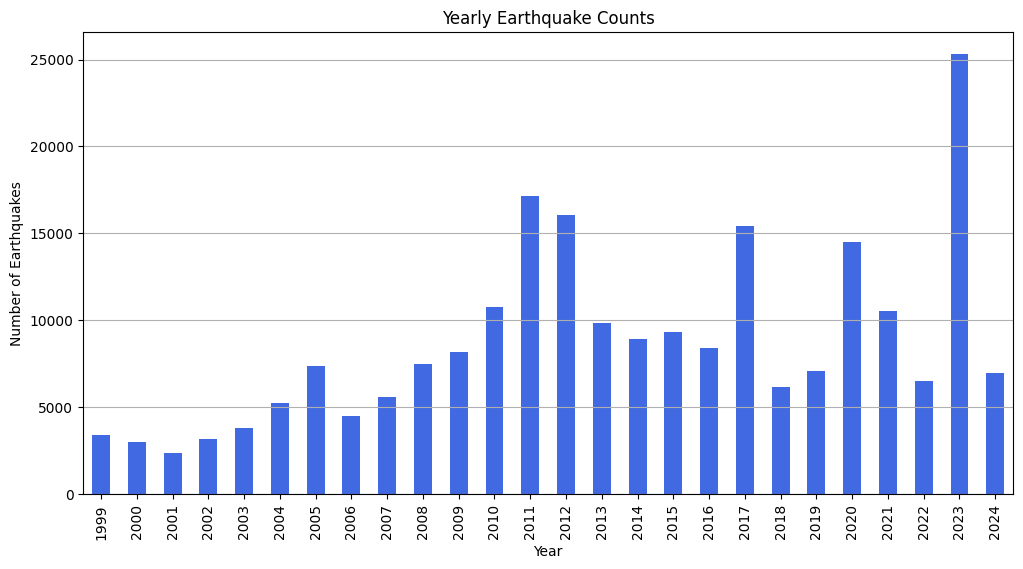

In [17]:
# YIL BAZLI
import matplotlib.pyplot as plt

# Her yıl kaç deprem olmuş?
yearly_counts = earthquake['year'].value_counts().sort_index()

# Görselleştirme
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='bar', color='royalblue')
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.title("Yearly Earthquake Counts")
plt.grid(axis='y')
plt.show()

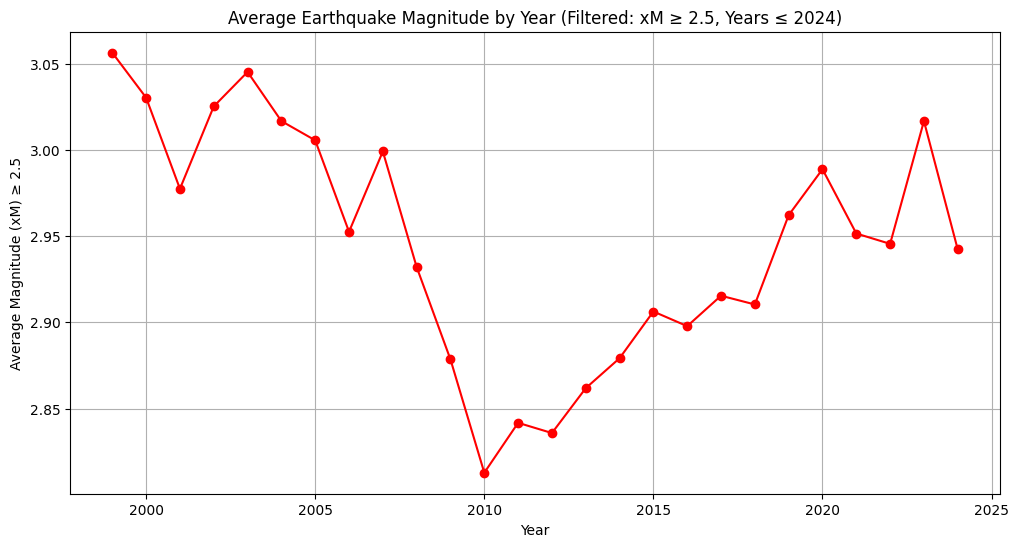

In [18]:
import matplotlib.pyplot as plt

# 2.5 üstü deprem büyüklükleri ile filtrelenmiş veri kümesi (1999-2024 arası)
filtered_earthquake = earthquake[(earthquake['xM'] >= 2.5) & (earthquake['year'] <= 2024)]

# Yıllık ortalama deprem büyüklüğü
yearly_magnitude = filtered_earthquake.groupby('year')['xM'].mean()

# Grafik çizimi
plt.figure(figsize=(12, 6))
yearly_magnitude.plot(kind='line', marker='o', color='red', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Average Magnitude (xM) ≥ 2.5")
plt.title("Average Earthquake Magnitude by Year (Filtered: xM ≥ 2.5, Years ≤ 2024)")
plt.grid(True)
plt.show()

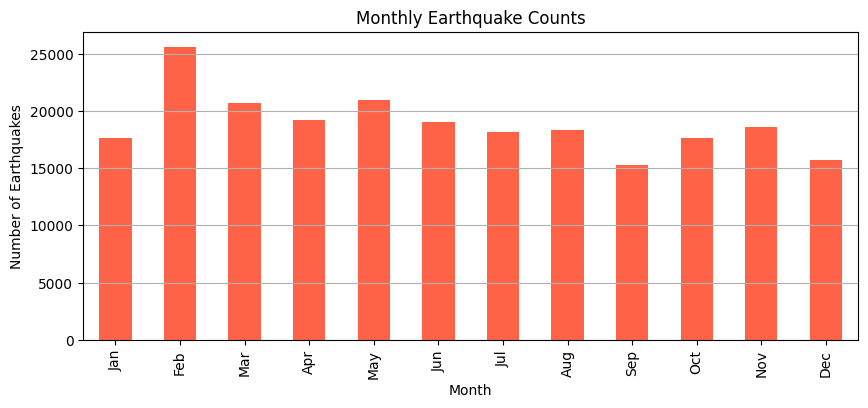

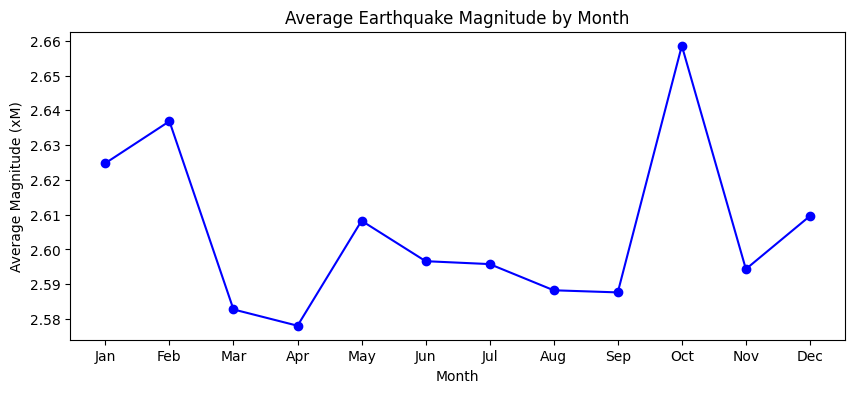

In [19]:
# AY BAZLI

# Aylık deprem sayısı analizi
monthly_counts = earthquake['month'].value_counts().sort_index()

plt.figure(figsize=(10, 4))
monthly_counts.plot(kind='bar', color='tomato')
plt.xlabel("Month")
plt.ylabel("Number of Earthquakes")
plt.title("Monthly Earthquake Counts")
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()

# Aylık Ortalama Deprem Büyüklüğü (xM ile)
monthly_magnitude = earthquake.groupby('month')['xM'].mean()

plt.figure(figsize=(10, 4))
monthly_magnitude.plot(kind='line', marker='o', color='blue')
plt.xlabel("Month")
plt.ylabel("Average Magnitude (xM)")
plt.title("Average Earthquake Magnitude by Month")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


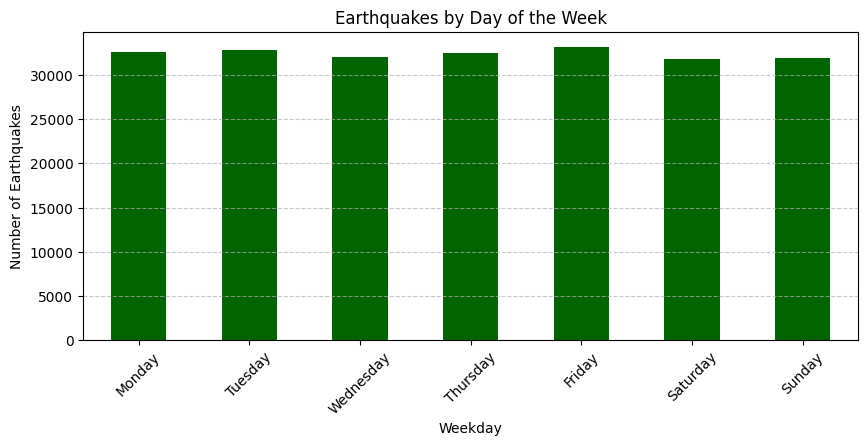

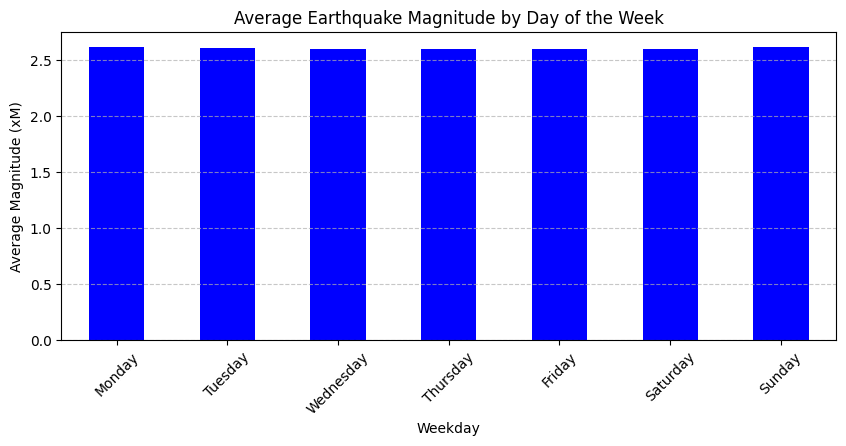

In [20]:
# HAFTA GÜNÜ
# 🔹 3.1. Haftanın Günlerine Göre Deprem Sayısı
weekday_counts = earthquake['weekday_name'].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

plt.figure(figsize=(10, 4))
weekday_counts.plot(kind='bar', color='darkgreen')
plt.xlabel("Weekday")
plt.ylabel("Number of Earthquakes")
plt.title("Earthquakes by Day of the Week")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 🔹 3.2. Haftanın Günlerine Göre Ortalama Deprem Büyüklüğü (xM ile)
weekday_magnitude = earthquake.groupby('weekday_name')['xM'].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

plt.figure(figsize=(10, 4))
weekday_magnitude.plot(kind='bar', color='blue')
plt.xlabel("Weekday")
plt.ylabel("Average Magnitude (xM)")
plt.title("Average Earthquake Magnitude by Day of the Week")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


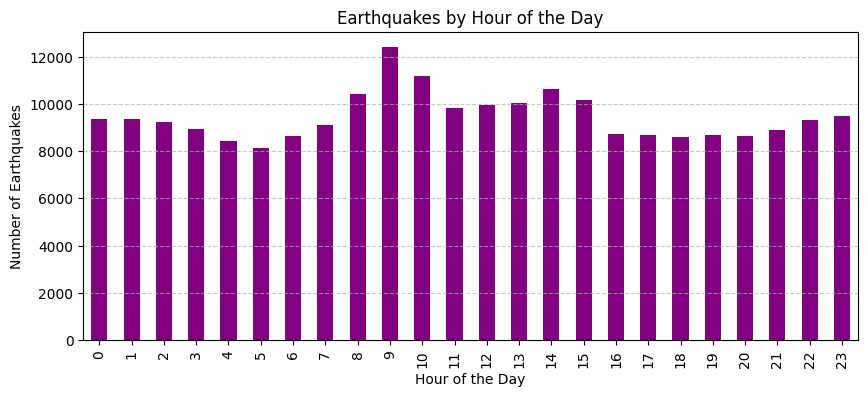

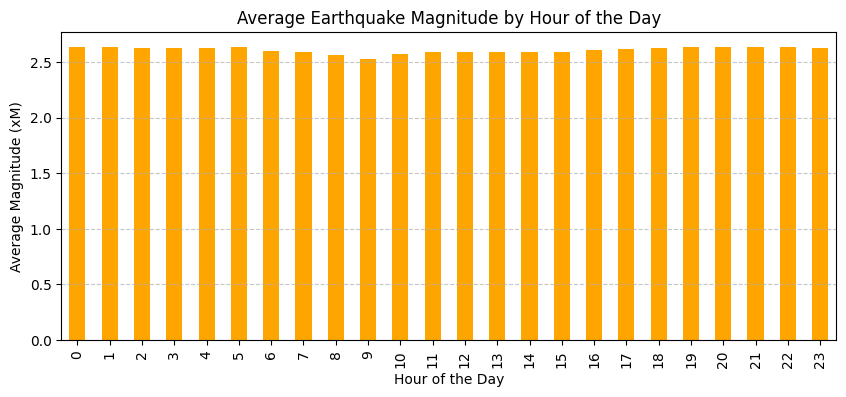

In [21]:
# SAAT BAZLI

# 🔹 4.1. Saat Bazlı Deprem Sayısı
hourly_counts = earthquake['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 4))
hourly_counts.plot(kind='bar', color='purple')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Earthquakes")
plt.title("Earthquakes by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 🔹 4.2. Saat Bazlı Ortalama Deprem Büyüklüğü (xM ile)
hourly_magnitude = earthquake.groupby('hour')['xM'].mean()

plt.figure(figsize=(10, 4))
hourly_magnitude.plot(kind='bar', color='orange')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Magnitude (xM)")
plt.title("Average Earthquake Magnitude by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


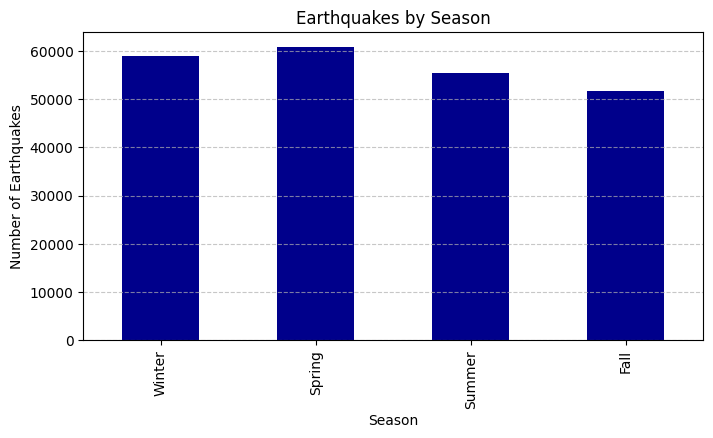

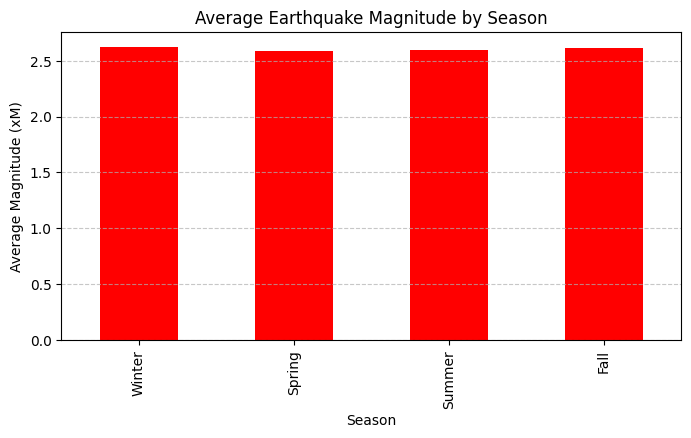

In [22]:
# MEVSİME GÖRE
# 🔹 5.1. Mevsimlere Göre Deprem Sayısı
season_counts = earthquake['season'].value_counts().reindex(["Winter", "Spring", "Summer", "Fall"])

plt.figure(figsize=(8, 4))
season_counts.plot(kind='bar', color='darkblue')
plt.xlabel("Season")
plt.ylabel("Number of Earthquakes")
plt.title("Earthquakes by Season")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 🔹 5.2. Mevsimlere Göre Ortalama Deprem Büyüklüğü (xM ile)
season_magnitude = earthquake.groupby('season')['xM'].mean().reindex(["Winter", "Spring", "Summer", "Fall"])

plt.figure(figsize=(8, 4))
season_magnitude.plot(kind='bar', color='red')
plt.xlabel("Season")
plt.ylabel("Average Magnitude (xM)")
plt.title("Average Earthquake Magnitude by Season")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

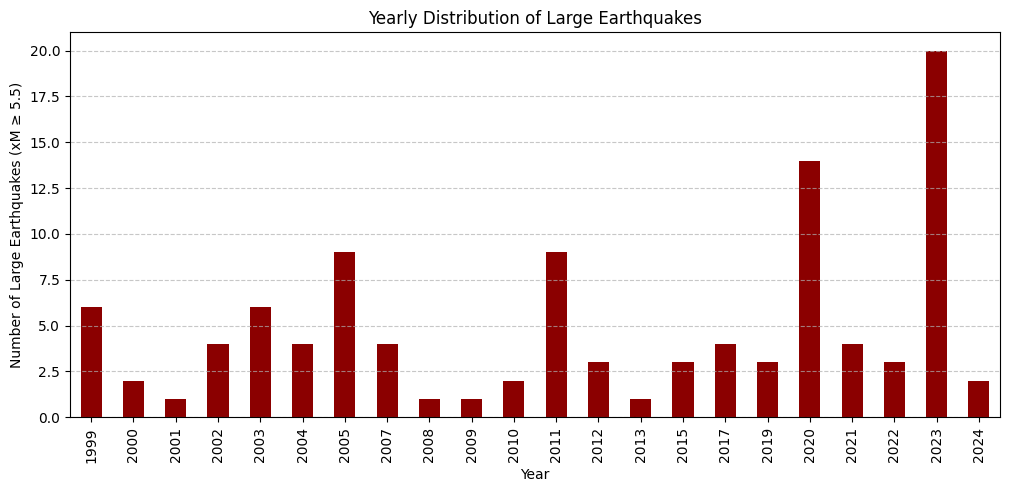

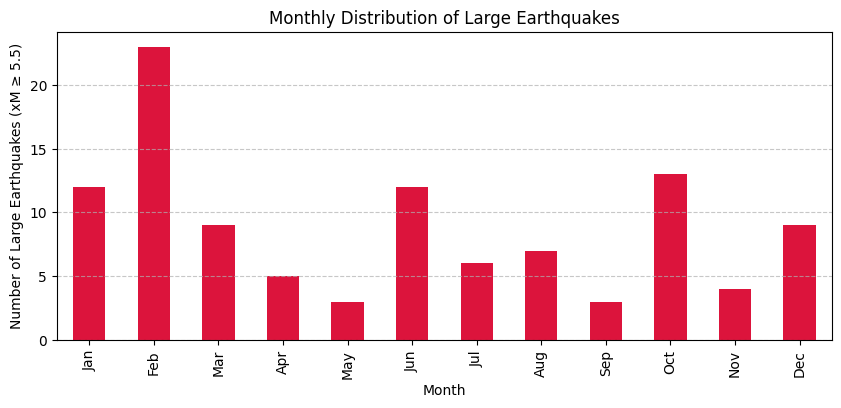

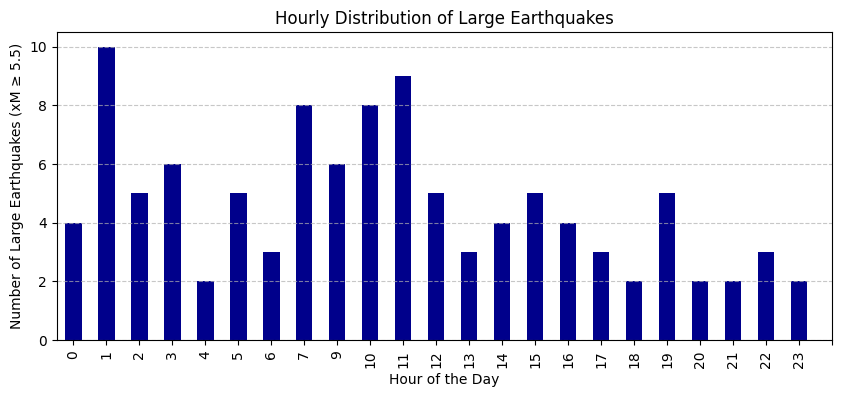

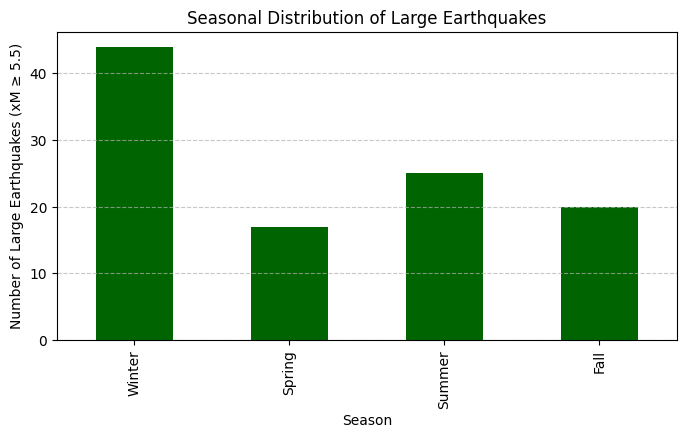

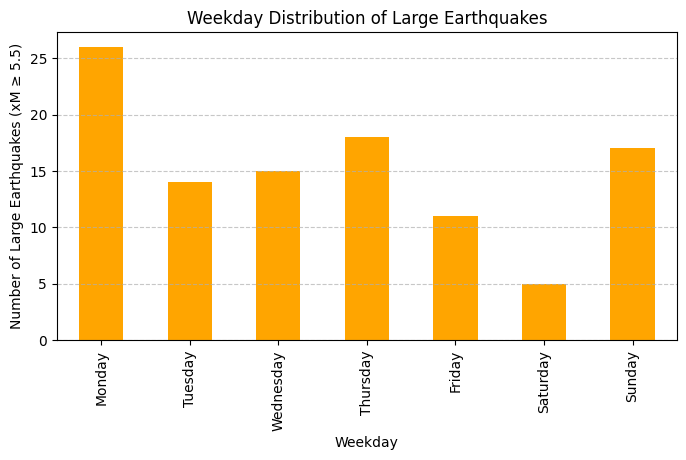

In [23]:
# 5.5 ve üzeri yıl ay hafta saat mevsim analizi tekte

# 📌 6️⃣ BÜYÜK DEPREMLERİN ZAMAN DAĞILIMI (xM ≥ 5.5)

# 🔹 Büyük depremleri filtrele (xM ≥ 5.5)
big_eq = earthquake[earthquake['xM'] >= 5.5]

# 🔹 6.1. Büyük Depremlerin Yıllara Göre Dağılımı
big_eq_yearly_counts = big_eq['year'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
big_eq_yearly_counts.plot(kind='bar', color='darkred')
plt.xlabel("Year")
plt.ylabel("Number of Large Earthquakes (xM ≥ 5.5)")
plt.title("Yearly Distribution of Large Earthquakes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 🔹 6.2. Büyük Depremlerin Aylara Göre Dağılımı
big_eq_monthly_counts = big_eq['month'].value_counts().sort_index()

plt.figure(figsize=(10, 4))
big_eq_monthly_counts.plot(kind='bar', color='crimson')
plt.xlabel("Month")
plt.ylabel("Number of Large Earthquakes (xM ≥ 5.5)")
plt.title("Monthly Distribution of Large Earthquakes")
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 🔹 6.3. Büyük Depremlerin Saatlere Göre Dağılımı
big_eq_hourly_counts = big_eq['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 4))
big_eq_hourly_counts.plot(kind='bar', color='darkblue')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Large Earthquakes (xM ≥ 5.5)")
plt.title("Hourly Distribution of Large Earthquakes")
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 🔹 6.4. Büyük Depremlerin Mevsimsel Dağılımı
big_eq_season_counts = big_eq['season'].value_counts().reindex(["Winter", "Spring", "Summer", "Fall"])

plt.figure(figsize=(8, 4))
big_eq_season_counts.plot(kind='bar', color='darkgreen')
plt.xlabel("Season")
plt.ylabel("Number of Large Earthquakes (xM ≥ 5.5)")
plt.title("Seasonal Distribution of Large Earthquakes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 🔹 6.4. Büyük Depremlerin Günlere Göre Dağılımı
big_eq_season_counts = big_eq['weekday_name'].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

plt.figure(figsize=(8, 4))
big_eq_season_counts.plot(kind='bar', color='orange')
plt.xlabel("Weekday")
plt.ylabel("Number of Large Earthquakes (xM ≥ 5.5)")
plt.title("Weekday Distribution of Large Earthquakes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 2. KONUM BAZLI ANALİZLER

#### 2.1 Harita Üzerinde Depremler

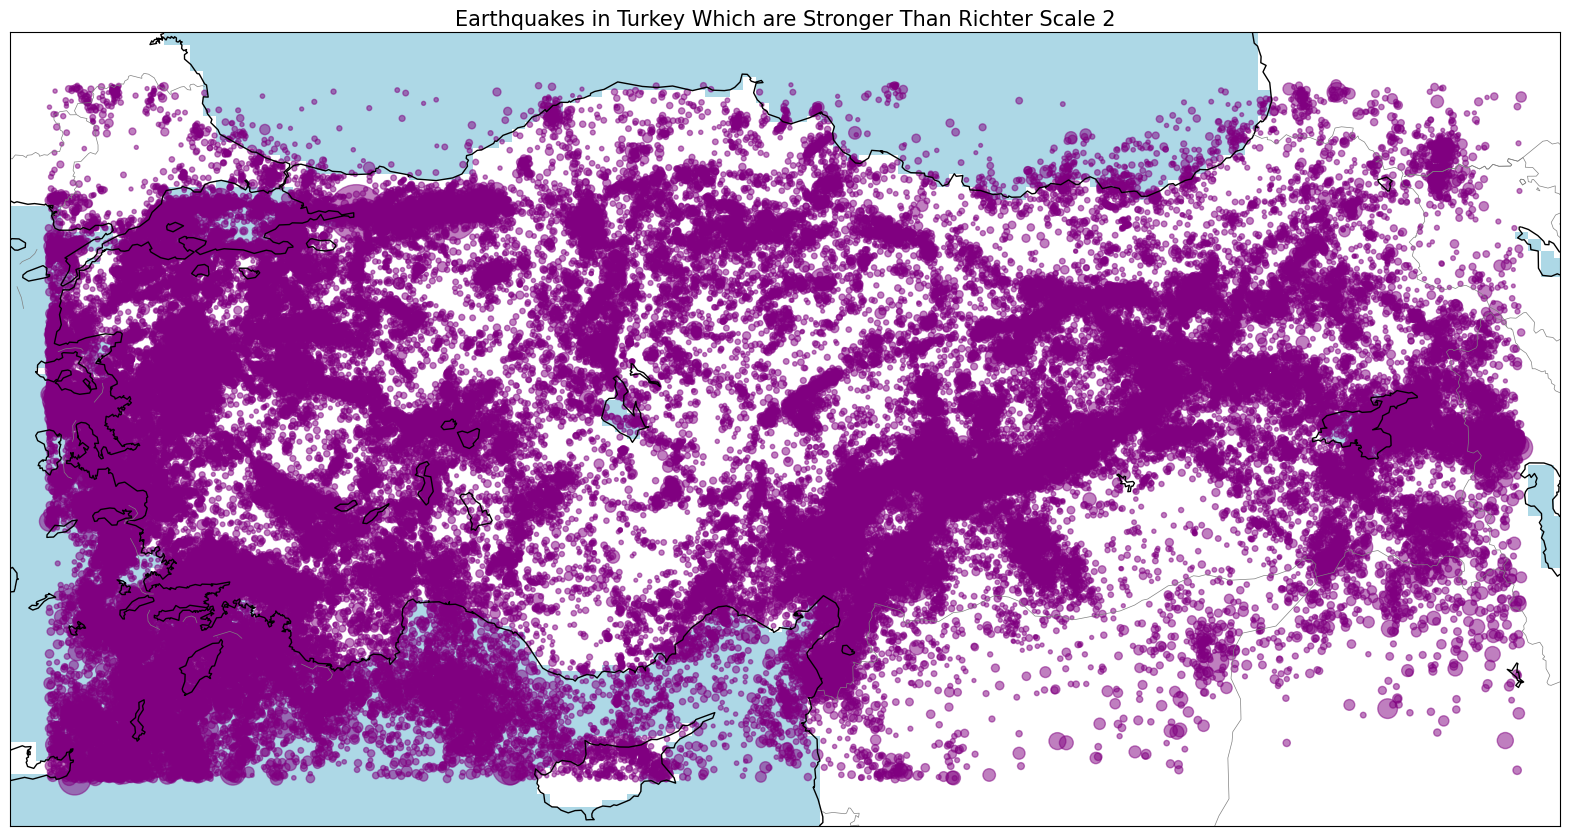

In [24]:
# HARİTADA İŞARETLEME 1
import numpy as np
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(20,12))

m = Basemap(projection='merc',
           llcrnrlat=34.5,
           urcrnrlat=42.5,
           llcrnrlon=25.5,
           urcrnrlon=45.5,
           resolution='i')

m.drawcoastlines()
m.drawcountries(color='gray')
m.drawlsmask(land_color='white', ocean_color='lightblue')

xs,ys = m(earthquake['Longtitude'], earthquake['Latitude'])
ss = np.exp(earthquake['xM'])
m.scatter(xs, ys, c='purple', s=ss, alpha=0.5)

plt.title("Earthquakes in Turkey Which are Stronger Than Richter Scale 2", fontdict={"fontsize": 15}, pad=5);

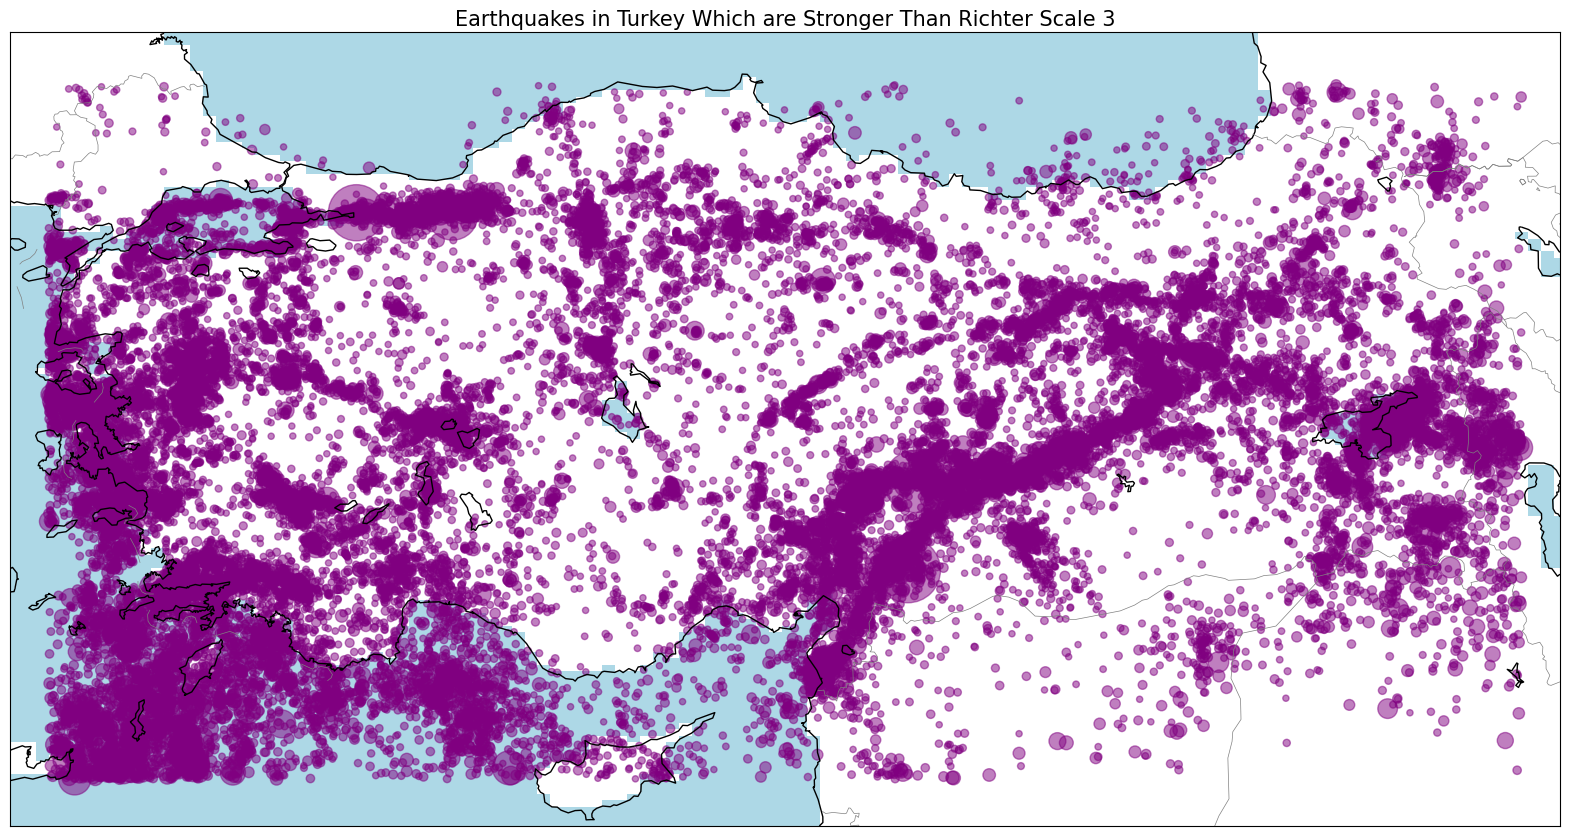

In [25]:
# HARİTADA İŞARETLEME 3

filtered_earthquake = earthquake[earthquake['xM'] >= 3]

plt.figure(figsize=(20,12))

m = Basemap(projection='merc',
           llcrnrlat=34.5,
           urcrnrlat=42.5,
           llcrnrlon=25.5,
           urcrnrlon=45.5,
           resolution='i')

m.drawcoastlines()
m.drawcountries(color='gray')
m.drawlsmask(land_color='white', ocean_color='lightblue')

xs,ys = m(filtered_earthquake['Longtitude'], filtered_earthquake['Latitude'])
ss = np.exp(filtered_earthquake['xM'])
m.scatter(xs, ys, c='purple', s=ss, alpha=0.5)

plt.title("Earthquakes in Turkey Which are Stronger Than Richter Scale 3", fontdict={"fontsize": 15}, pad=5);

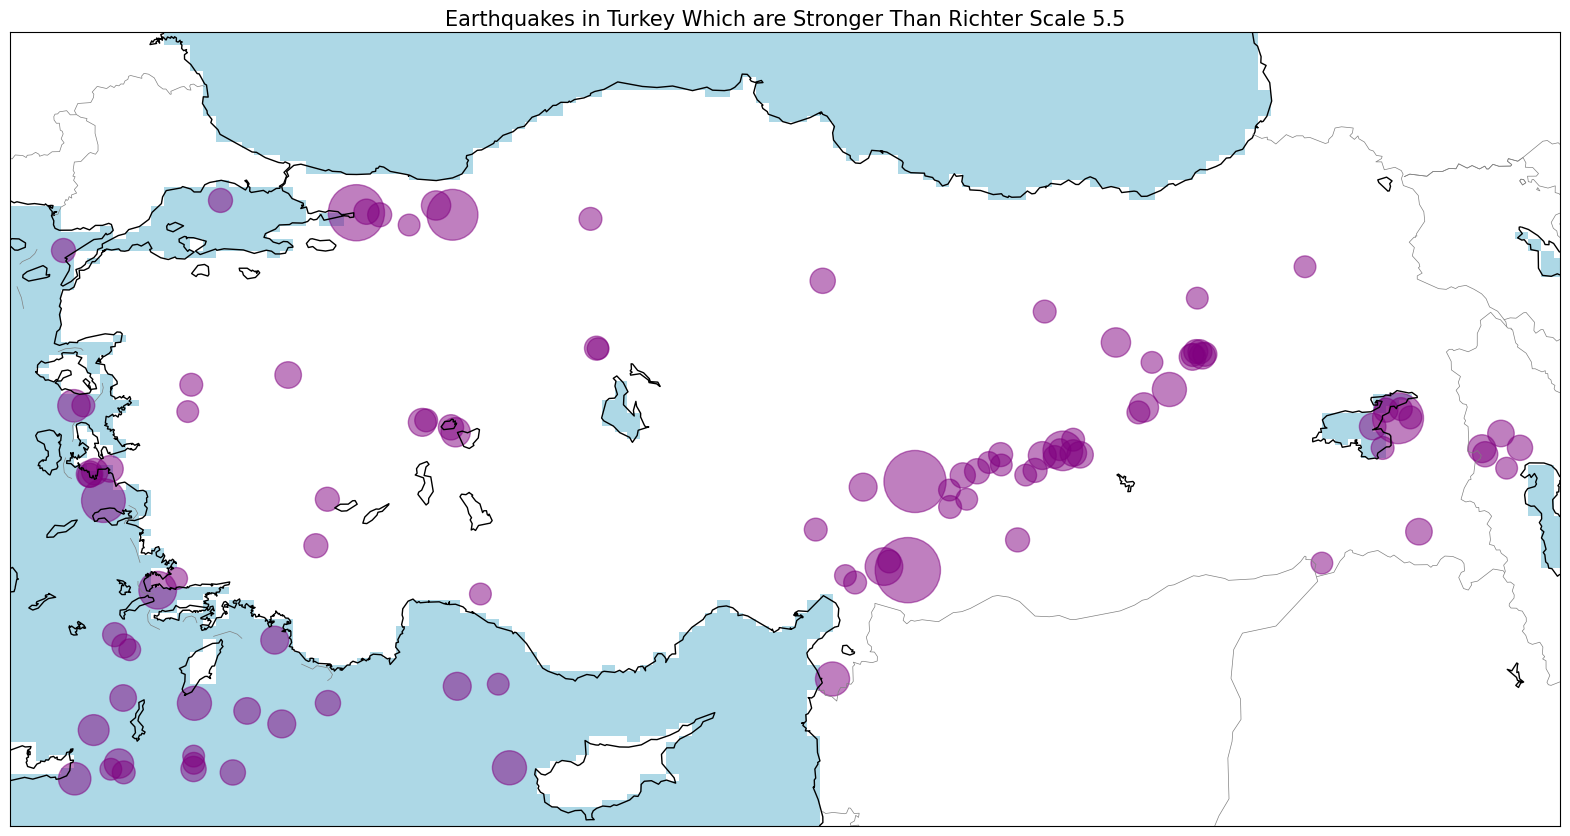

In [26]:
# HARİTADA İŞARETLEME 5

filtered_earthquake = earthquake[earthquake['xM'] >= 5.5]

plt.figure(figsize=(20,12))

m = Basemap(projection='merc',
           llcrnrlat=34.5,
           urcrnrlat=42.5,
           llcrnrlon=25.5,
           urcrnrlon=45.5,
           resolution='i')

m.drawcoastlines()
m.drawcountries(color='gray')
m.drawlsmask(land_color='white', ocean_color='lightblue')

xs,ys = m(filtered_earthquake['Longtitude'], filtered_earthquake['Latitude'])
ss = np.exp(filtered_earthquake['xM'])
m.scatter(xs, ys, c='purple', s=ss, alpha=0.5)

plt.title("Earthquakes in Turkey Which are Stronger Than Richter Scale 5.5", fontdict={"fontsize": 15}, pad=5);

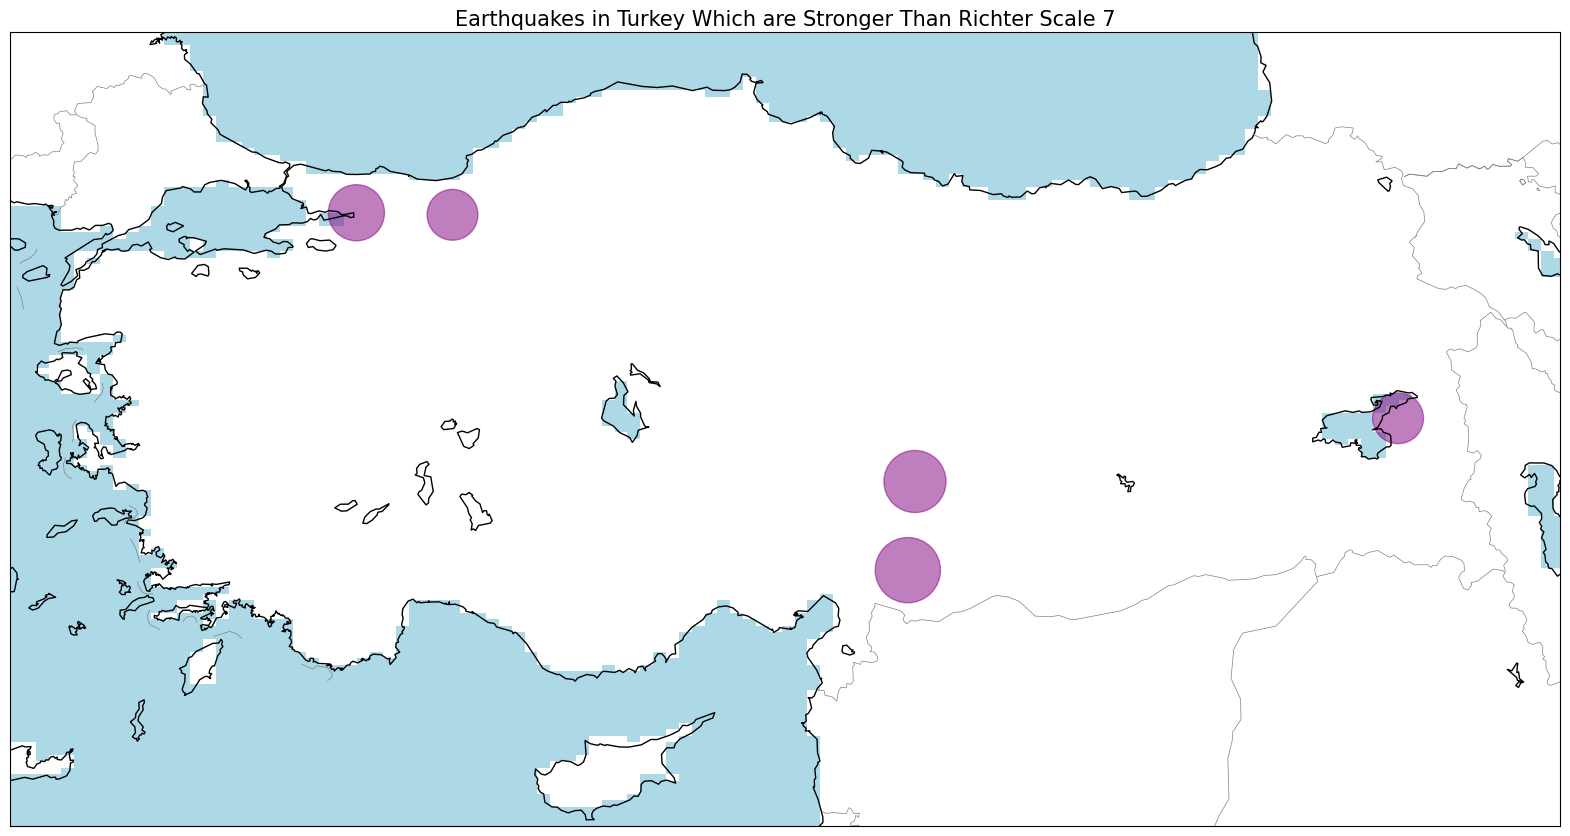

In [27]:
# HARİTADA İŞARETLEME 7

filtered_earthquake = earthquake[earthquake['xM'] >= 7]

plt.figure(figsize=(20,12))

m = Basemap(projection='merc',
           llcrnrlat=34.5,
           urcrnrlat=42.5,
           llcrnrlon=25.5,
           urcrnrlon=45.5,
           resolution='i')

m.drawcoastlines()
m.drawcountries(color='gray')
m.drawlsmask(land_color='white', ocean_color='lightblue')

xs,ys = m(filtered_earthquake['Longtitude'], filtered_earthquake['Latitude'])
ss = np.exp(filtered_earthquake['xM'])
m.scatter(xs, ys, c='purple', s=ss, alpha=0.5)

plt.title("Earthquakes in Turkey Which are Stronger Than Richter Scale 7", fontdict={"fontsize": 15}, pad=5);

#### 2.2 Şehir ve Bölge

In [28]:
# 📌 7 Bölge ve İller
region_dict = {
    "Marmara": 'ISTANBUL|EDIRNE|KIRKLARELI|TEKIRDAG|ÇANAKKALE|CANAKKALE|KOCAELI|YALOVA|SAKARYA|BILECIK|BURSA|BALIKESIR|MARMARA|BULGARISTAN',
    "Ege": 'IZMIR|MANISA|AYDIN|DENIZLI|MUGLA|AFYONKARAHISAR|AFYON|USAK|KUTAHYA|KÜTAHYA|EGE',
    "İç Anadolu": 'ESKISEHIR|KONYA|ANKARA|CANKIRI|ÇANKIRI|AKSARAY|KIRIKKALE|KIRSEHIR|YOZGAT|NIGDE|NEVSEHIR|KAYSERI|KARAMAN|SIVAS',
    "Akdeniz": 'ANTALYA|BURDUR|ISPARTA|MERSIN|ADANA|HATAY|OSMANIYE|KAHRAMANMARAS|AKDENIZ|KIBRIS',
    "Karadeniz": 'BOLU|DUZCE|ZONGULDAK|KARABUK|KARABÜK|BARTIN|KASTAMONU|CORUM|ÇORUM|SINOP|SAMSUN|AMASYA|TOKAT|ORDU|GIRESUN|GUMUSHANE|TRABZON|BAYBURT|RIZE|ARTVIN|KARADENIZ|GURCISTAN',
    "Doğu Anadolu": 'MALATYA|ERZINCAN|ELAZIG|TUNCELI|BINGOL|BINGÖL|ERZURUM|MUS|BITLIS|KARS|AGRI|ARDAHAN|VAN|IGDIR|HAKKARI|IRAN|ERMENISTAN|ARMENIA|AZERBAYCAN',
    "Güneydoğu Anadolu": 'GAZIANTEP|KILIS|ADIYAMAN|SANLIURFA|DIYARBAKIR|MARDIN|BATMAN|SIIRT|SIRNAK|IRAK|SURIYE'
}

# 📌 Özel yerler (Denizler, göller, adalar)
special_places = {
    "KUS GÖLÜ": "Marmara",
    "KUS GOLU": "Marmara",
    "GOKCEADA": "Marmara",
    "BOZCAADA": "Marmara",
    "YUNANISTAN": "Marmara",
    "IZNIK GOLU": "Marmara",
    "IZNIK GÖLÜ": "Marmara",
    "ULUBAT GOLU": "Marmara",
    "ULUBAT GÖLÜ": "Marmara",
    "SAPANCA GOLU": "Marmara",
    "MARMARA DENIZI": "Marmara",
    "BUYUKCEKMECE GOLU": "Marmara",
    "EGE DENIZI": "Ege",
    "RODOS ADASI": "Ege",
    "MIDILLI ADASI": "Ege",
    "TUZ GOLU": "İç Anadolu",
    "AKDENIZ": "Akdeniz",
    "KARADENIZ": "Karadeniz",
    "VAN GOLU": "Doğu Anadolu",
    #"GÜRCISTAN": "Doğu Anadolu",
    "AZARBEYCAN": "Doğu Anadolu",
}

In [29]:
# 📌 Bölgeyi belirleyen fonksiyon
def assign_region(location):
    if isinstance(location, str):  # Eğer metinse işlem yap
        location = location.upper()  # TÜM HARFLERİ BÜYÜK YAP
        
        # 📌 Önce özel yerleri kontrol et
        for place, region in special_places.items():
            if place in location:
                return region

        # 📌 Sonra illere göre bölgeyi belirle
        for region, cities in region_dict.items():
            city_list = cities.split('|')  # Şehirleri listeye çevir
            if any(city in location for city in city_list):
                return region
    return "Unknown"  # Hiçbir kategoriye uymayanlar

Gürcistana özel muamele

In [30]:
# 📌 Veri setine yeni bölge sütunu ekleyelim
earthquake['Region'] = earthquake['Location'].apply(assign_region)

In [31]:
def assign_georgia_region(latitude, longitude):
    if 41 <= latitude <= 43 and 40 <= longitude <= 42:
        return "Karadeniz"  # Batı Gürcistan, Artvin ve Rize'ye yakın
    elif 41 <= latitude <= 43 and 42 <= longitude <= 47:
        return "Doğu Anadolu"  # Doğu Gürcistan, Ardahan ve Kars'a yakın
    return "Unknown"

In [32]:
# Gürcistan için özel bakalım
# 📌 📍 Gürcistan olup "Unknown" kalanları düzeltelim
mask = (earthquake['Region'] == "Unknown") & (earthquake['Location'].str.contains("GÜRCISTAN|GÜRCİSTAN|GÜRCiSTAN", na=False))
earthquake.loc[mask, 'Region'] = earthquake.loc[mask].apply(lambda row: assign_georgia_region(row['Latitude'], row['Longtitude']), axis=1)


In [33]:
# 📌 İlk 20 sonucu kontrol edelim
print(earthquake[['Location', 'Region']].head(1000))

                                              Location     Region
0       DEDEDUZU-GUMUSOVA (DUZCE) [South West  2.2 km]  Karadeniz
1       AKKOCALI-AKHISAR (MANISA) [North East  0.9 km]        Ege
2     HARMANTEPE-HENDEK (SAKARYA) [North East  0.8 km]    Marmara
3       YAGBASAN-HENDEK (SAKARYA) [North East  0.9 km]    Marmara
4                   KOZLU- (BOLU) [North West  4.9 km]  Karadeniz
..                                                 ...        ...
995  DEVEKAYASI-TAVSANLI (KÜTAHYA) [South West  0.2...        Ege
996      TUTENLI-AKHISAR (MANISA) [North East  2.0 km]        Ege
997                     IZMIT KÖRFEZI (MARMARA DENIZI)    Marmara
998             TOYLAR-DERINCE (KOCAELI) [West 2.1 km]    Marmara
999     SULTANIYE-IZMIT (KOCAELI) [North East  2.6 km]    Marmara

[1000 rows x 2 columns]


In [34]:
earthquake[(earthquake['Region'])=='Unknown']

Empty DataFrame
Columns: [ID, Code, Latitude, Longtitude, Depth(KM), xM, MD, ML, Ms, Mb, Type, Location, datetime, year, month, day, hour, weekday, weekday_name, season, Region]
Index: []

[0 rows x 21 columns]

TÜM DEPREMLERİ BÖLGELERLE EŞLEŞTİRMİŞ OLDUK

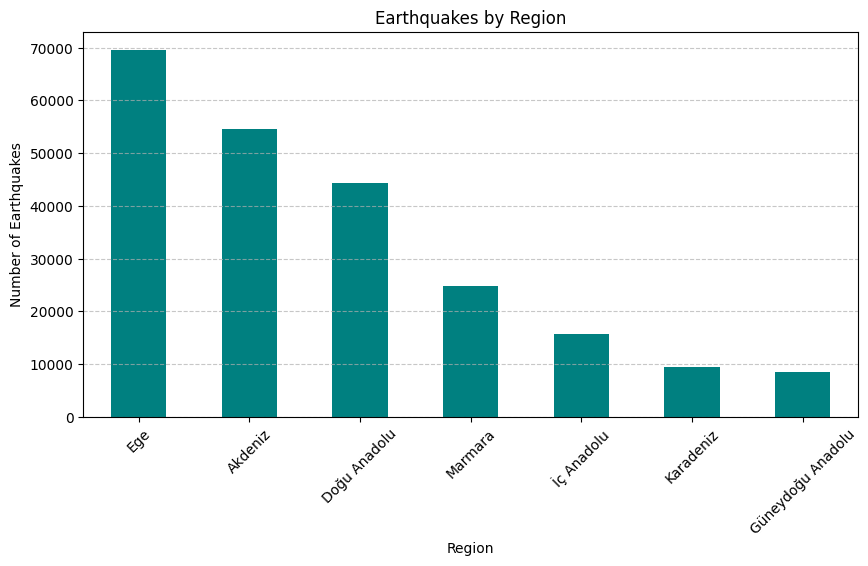

In [35]:
region_counts = earthquake['Region'].value_counts()

plt.figure(figsize=(10, 5))
region_counts.plot(kind='bar', color='teal')
plt.xlabel("Region")
plt.ylabel("Number of Earthquakes")
plt.title("Earthquakes by Region")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


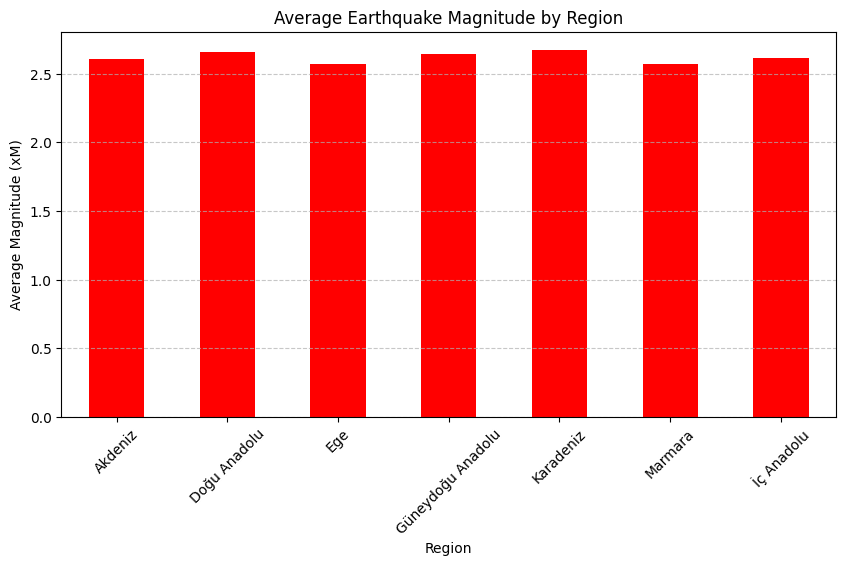

In [36]:
# BÖLGESEL 1
region_magnitude = earthquake.groupby('Region')['xM'].mean()

plt.figure(figsize=(10, 5))
region_magnitude.plot(kind='bar', color='red')
plt.xlabel("Region")
plt.ylabel("Average Magnitude (xM)")
plt.title("Average Earthquake Magnitude by Region")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1200x600 with 0 Axes>

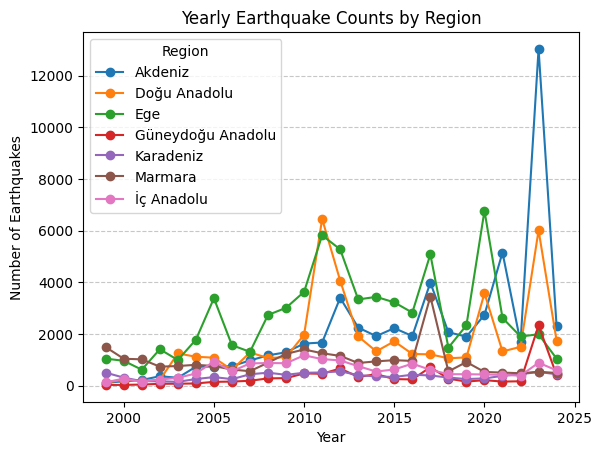

In [37]:
# Yıllara göre bölgesel deprem dağılımı
region_yearly_counts = earthquake.groupby(['year', 'Region']).size().unstack()

plt.figure(figsize=(12, 6))
region_yearly_counts.plot(kind='line', marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.title("Yearly Earthquake Counts by Region")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Region")
plt.show()


In [38]:
earthquake.columns


Index(['ID', 'Code', 'Latitude', 'Longtitude', 'Depth(KM)', 'xM', 'MD', 'ML',
       'Ms', 'Mb', 'Type', 'Location', 'datetime', 'year', 'month', 'day',
       'hour', 'weekday', 'weekday_name', 'season', 'Region'],
      dtype='object')

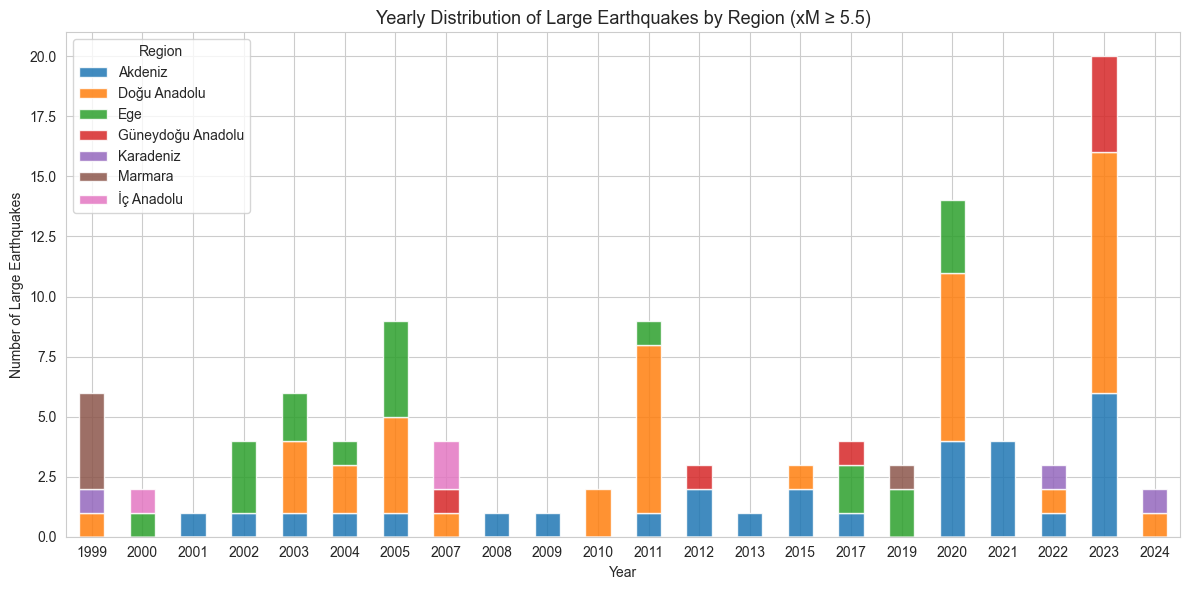

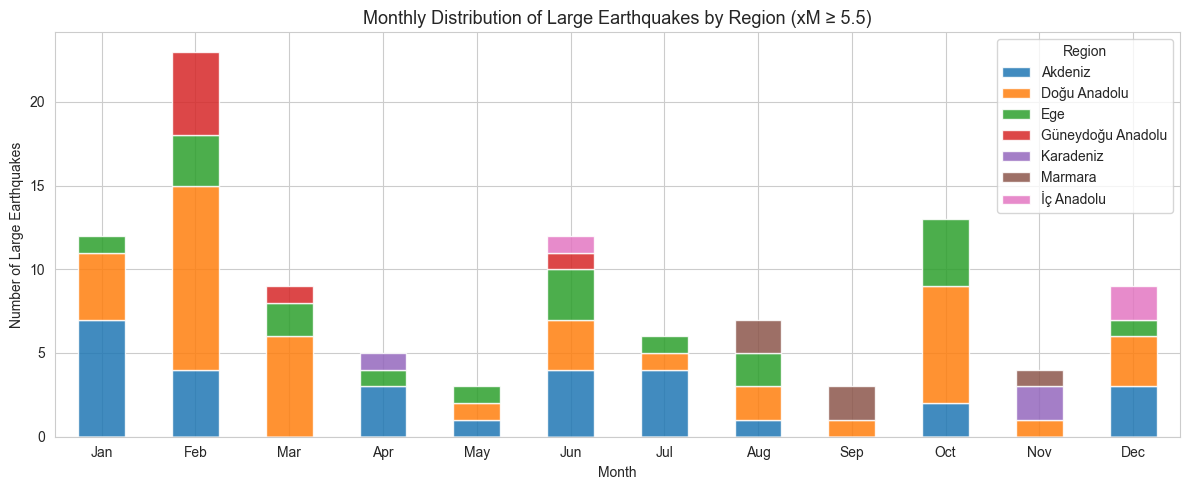

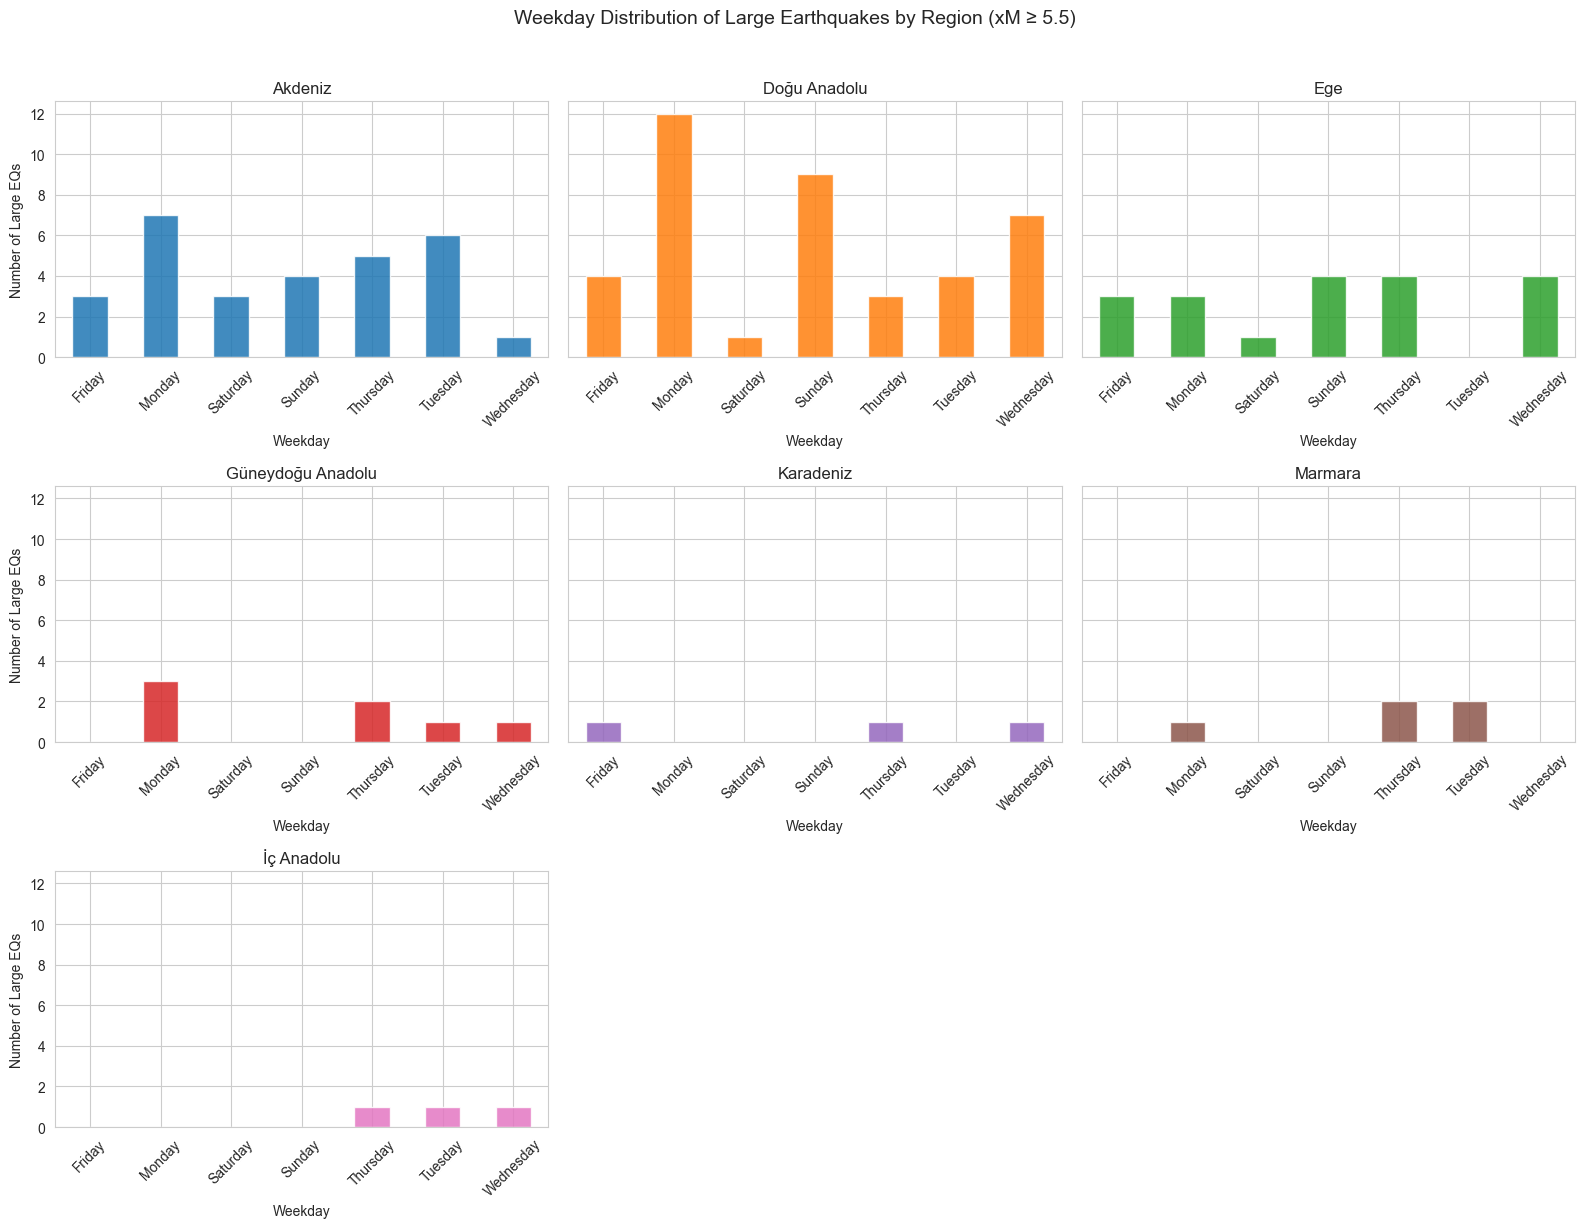

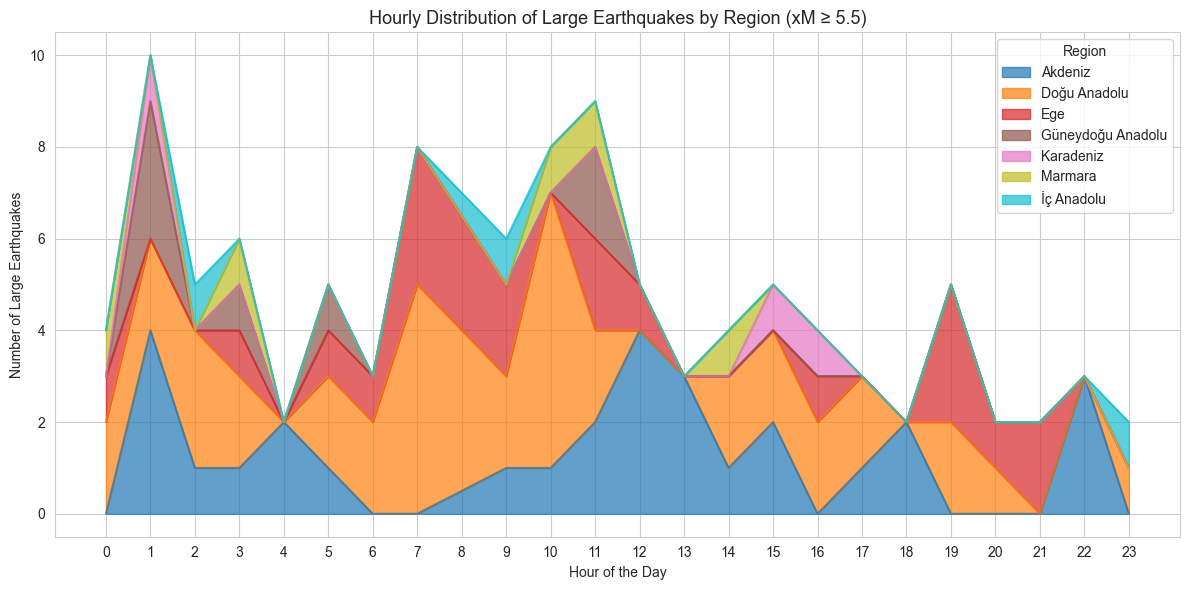

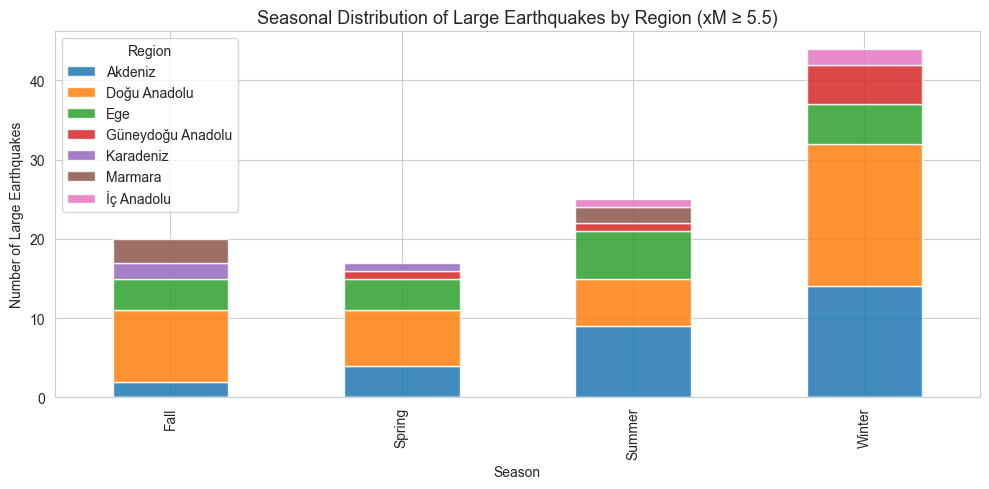

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn stil ve renk paleti
sns.set_style("whitegrid")
sns.set_palette("tab10")

big_eq = earthquake[earthquake['xM'] >= 5.5]

# 1) Yıllara ve Bölgelere Göre Dağılım (Stacked Bar Chart)
big_eq_yearly_counts = big_eq.groupby(['year', 'Region']).size().unstack()

plt.figure(figsize=(12, 6))
ax = big_eq_yearly_counts.plot(
    kind='bar',
    stacked=True,
    alpha=0.85,           # Biraz saydamlık
    ax=plt.gca()
)
ax.set_title("Yearly Distribution of Large Earthquakes by Region (xM ≥ 5.5)", fontsize=13)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Large Earthquakes")
ax.legend(title="Region", loc="best")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2) Aylara ve Bölgelere Göre Dağılım (Stacked Bar Chart)
big_eq_monthly_counts = big_eq.groupby(['month', 'Region']).size().unstack()

plt.figure(figsize=(12, 5))
ax = big_eq_monthly_counts.plot(
    kind='bar',
    stacked=True,
    alpha=0.85,
    ax=plt.gca()
)
ax.set_title("Monthly Distribution of Large Earthquakes by Region (xM ≥ 5.5)", fontsize=13)
ax.set_xlabel("Month")
ax.set_ylabel("Number of Large Earthquakes")
# Ay etiketlerini manuel giriyorsanız:
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
ax.legend(title="Region", loc="best")
plt.tight_layout()
plt.show()

# 3) Günlere ve Bölgelere Göre Dağılım (Facet Grid - Ayrı Paneller)
big_eq_weekday_counts = big_eq.groupby(['weekday_name', 'Region']).size().unstack()

regions = big_eq_weekday_counts.columns
n_regions = len(regions)
ncols = 3  # Her satırda 3 grafik
nrows = (n_regions // ncols) + (1 if n_regions % ncols != 0 else 0)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4*nrows), sharey=True)
axes = axes.flatten()

for i, region in enumerate(regions):
    ax = axes[i]
    # Her bölge için bar chart
    big_eq_weekday_counts[region].plot(kind='bar', ax=ax, alpha=0.85, color=sns.color_palette('tab10')[i % 10])
    ax.set_title(f"{region}", fontsize=12)
    ax.set_xlabel("Weekday")
    ax.set_ylabel("Number of Large EQs")
    ax.set_xticklabels(big_eq_weekday_counts.index, rotation=45)

# Kullanılmayan eksenleri kapat
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Weekday Distribution of Large Earthquakes by Region (xM ≥ 5.5)", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# 4) Saatlere ve Bölgelere Göre Dağılım (Stacked Area Chart)
big_eq_hourly_counts = big_eq.groupby(['hour', 'Region']).size().unstack()

plt.figure(figsize=(12, 6))
ax = big_eq_hourly_counts.plot(
    kind='area',
    stacked=True,
    alpha=0.7,
    cmap='tab10',
    ax=plt.gca()
)
ax.set_title("Hourly Distribution of Large Earthquakes by Region (xM ≥ 5.5)", fontsize=13)
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Number of Large Earthquakes")
ax.set_xticks(range(24))
ax.set_xticklabels(range(24))
ax.legend(title="Region", loc="best")
plt.tight_layout()
plt.show()

# 5) Mevsimlere ve Bölgelere Göre Dağılım (Stacked Bar Chart)
big_eq_season_counts = big_eq.groupby(['season', 'Region']).size().unstack()

plt.figure(figsize=(10, 5))
ax = big_eq_season_counts.plot(
    kind='bar',
    stacked=True,
    alpha=0.85,
    ax=plt.gca()
)
ax.set_title("Seasonal Distribution of Large Earthquakes by Region (xM ≥ 5.5)", fontsize=13)
ax.set_xlabel("Season")
ax.set_ylabel("Number of Large Earthquakes")
ax.legend(title="Region", loc="best")
plt.tight_layout()
plt.show()


#### 2.3 Derinlik frekans magnitude bazlı analiz

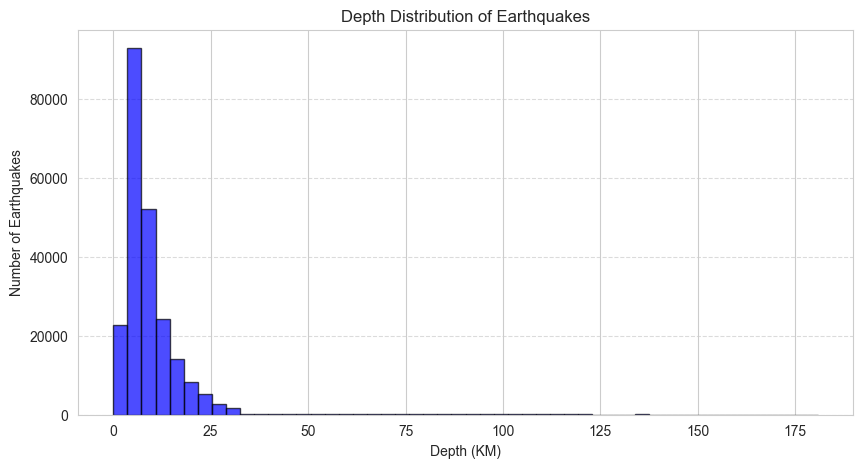

📌 Ortalama Deprem Derinliği: 9.63 KM


In [40]:
import matplotlib.pyplot as plt

# 🔹 Derinlik dağılımı histogramı
plt.figure(figsize=(10, 5))
plt.hist(earthquake['Depth(KM)'], bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel("Depth (KM)")
plt.ylabel("Number of Earthquakes")
plt.title("Depth Distribution of Earthquakes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 🔹 Ortalama derinlik
mean_depth = earthquake['Depth(KM)'].mean()
print(f"📌 Ortalama Deprem Derinliği: {mean_depth:.2f} KM")


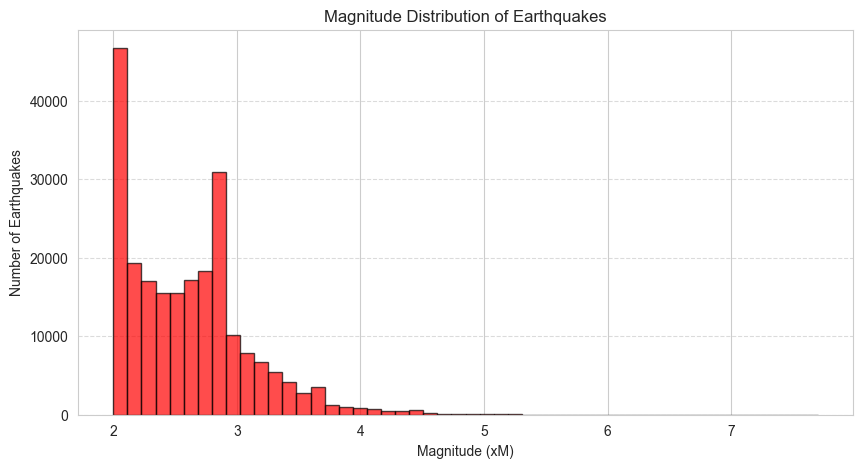

📌 Ortalama Deprem Büyüklüğü: 2.61


In [41]:
# 🔹 Büyüklük dağılımı histogramı
plt.figure(figsize=(10, 5))
plt.hist(earthquake['xM'], bins=50, color='red', edgecolor='black', alpha=0.7)
plt.xlabel("Magnitude (xM)")
plt.ylabel("Number of Earthquakes")
plt.title("Magnitude Distribution of Earthquakes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 🔹 Ortalama büyüklük
mean_magnitude = earthquake['xM'].mean()
print(f"📌 Ortalama Deprem Büyüklüğü: {mean_magnitude:.2f}")


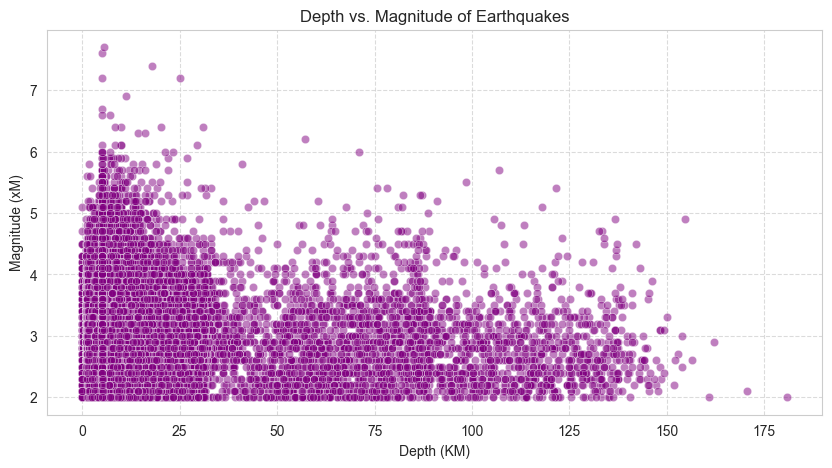

📌 Derinlik ile Büyüklük Arasındaki Korelasyon: 0.041


In [42]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.scatterplot(x=earthquake['Depth(KM)'], y=earthquake['xM'], alpha=0.5, color="purple")
plt.xlabel("Depth (KM)")
plt.ylabel("Magnitude (xM)")
plt.title("Depth vs. Magnitude of Earthquakes")
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# 🔹 Korelasyon katsayısı
correlation = earthquake['Depth(KM)'].corr(earthquake['xM'])
print(f"📌 Derinlik ile Büyüklük Arasındaki Korelasyon: {correlation:.3f}")


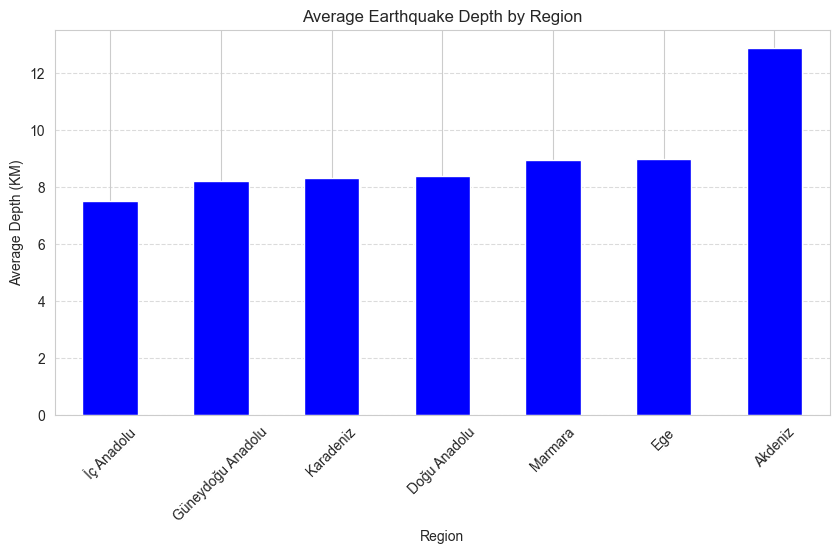

In [43]:
# 🔹 Bölgelere göre ortalama derinlik
region_depth = earthquake.groupby('Region')['Depth(KM)'].mean().sort_values()

plt.figure(figsize=(10, 5))
region_depth.plot(kind='bar', color='blue')
plt.xlabel("Region")
plt.ylabel("Average Depth (KM)")
plt.title("Average Earthquake Depth by Region")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

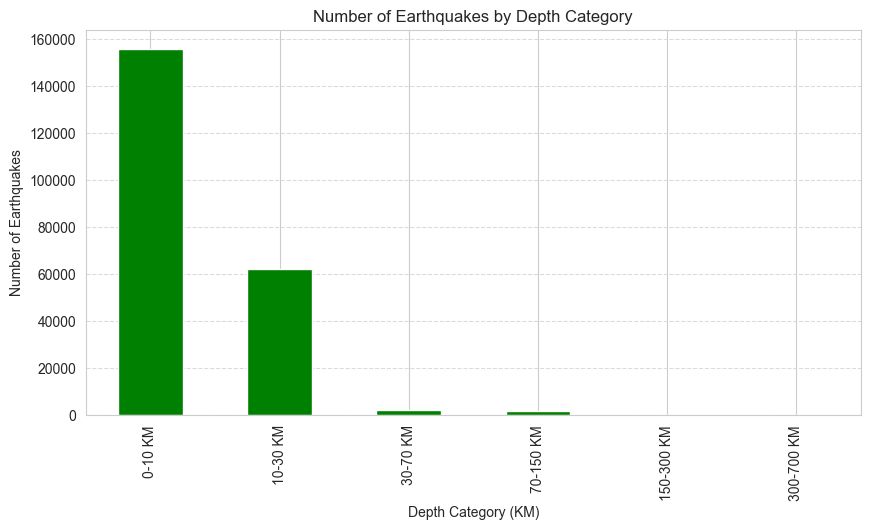

In [44]:
# 🔹 Derinlik aralıklarını belirleyelim
depth_bins = [0, 10, 30, 70, 150, 300, 700]
depth_labels = ["0-10 KM", "10-30 KM", "30-70 KM", "70-150 KM", "150-300 KM", "300-700 KM"]

earthquake['Depth_Category'] = pd.cut(earthquake['Depth(KM)'], bins=depth_bins, labels=depth_labels)

# 🔹 Derinlik kategorilerine göre deprem sayıları
depth_counts = earthquake['Depth_Category'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
depth_counts.plot(kind='bar', color='green')
plt.xlabel("Depth Category (KM)")
plt.ylabel("Number of Earthquakes")
plt.title("Number of Earthquakes by Depth Category")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


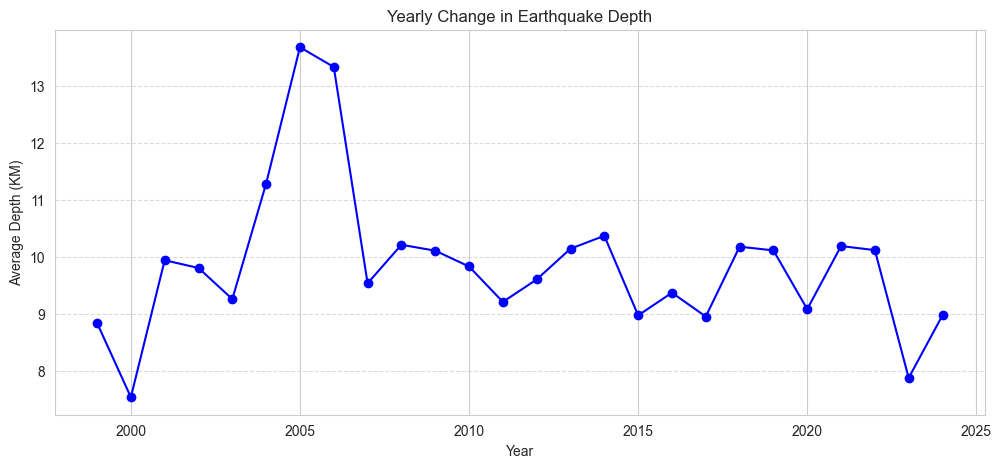

In [45]:
# 🔹 Yıllara Göre Ortalama Derinlik
yearly_depth = earthquake.groupby("year")["Depth(KM)"].mean()
plt.figure(figsize=(12, 5))
yearly_depth.plot(kind='line', marker='o', color='blue')
plt.xlabel("Year")
plt.ylabel("Average Depth (KM)")
plt.title("Yearly Change in Earthquake Depth")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

korelasyon analizi

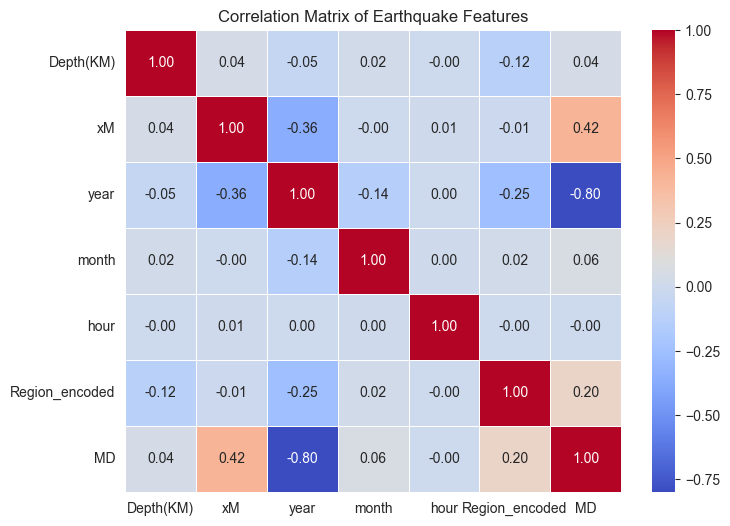

In [46]:
# 🔹 'Region' kategorisini sayısal hale getirme
earthquake['Region_encoded'] = earthquake['Region'].astype('category').cat.codes

# 🔹 Korelasyon matrisi oluştur
corr_matrix = earthquake[["Depth(KM)", "xM", "year", "month", "hour", "Region_encoded",'MD']].corr()

# 🔹 Heatmap çizimi
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Earthquake Features")
plt.show()


ZAMAN SERİSİ ANALİZİ

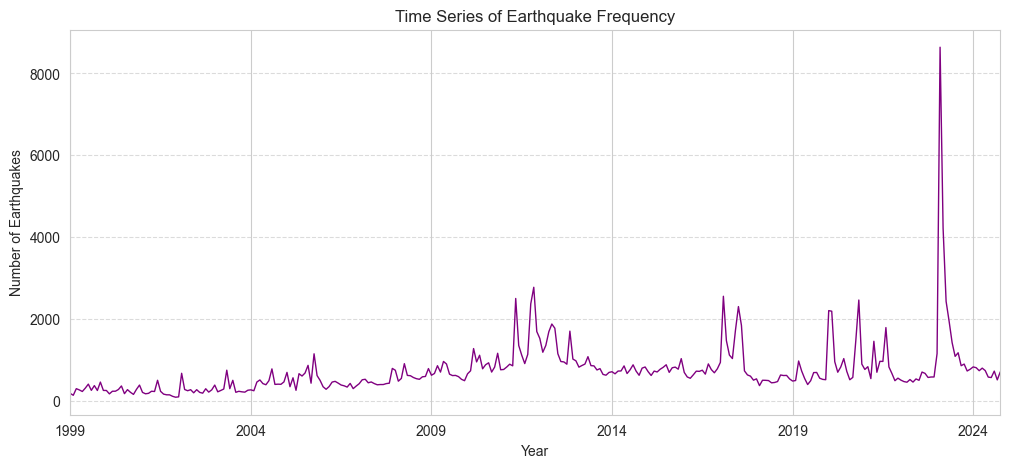

In [47]:
# 🔹 Zaman serisi analizi için depremleri aylık bazda gruplayalım
monthly_earthquakes = earthquake.resample("ME", on="datetime").size()

plt.figure(figsize=(12, 5))
monthly_earthquakes.plot(color='purple', linewidth=1)
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.title("Time Series of Earthquake Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


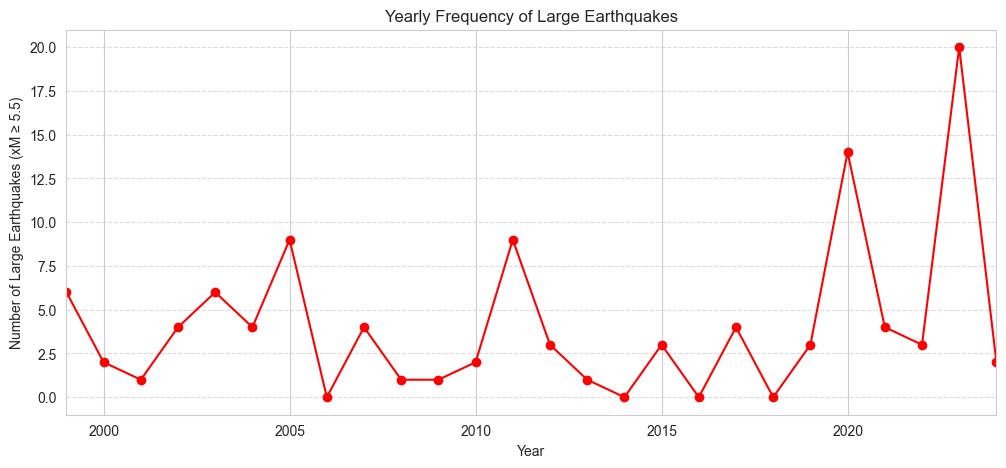

In [48]:
# 🔹 Büyük depremleri filtreleyelim
big_earthquakes = earthquake[earthquake["xM"] >= 5.5]

# 🔹 Yıllık bazda büyük deprem sayısını hesaplayalım
big_eq_yearly_counts = big_earthquakes.resample("YE", on="datetime").size()

# 🔹 Grafik çizelim
plt.figure(figsize=(12, 5))
big_eq_yearly_counts.plot(color='red', marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Number of Large Earthquakes (xM ≥ 5.5)")
plt.title("Yearly Frequency of Large Earthquakes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 3. MODELLİNG

## 3.1 Preparing

In [49]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227133 entries, 0 to 397350
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID              227133 non-null  int64         
 1   Code            227133 non-null  int64         
 2   Latitude        227133 non-null  float64       
 3   Longtitude      227133 non-null  float64       
 4   Depth(KM)       227133 non-null  float64       
 5   xM              227133 non-null  float64       
 6   MD              227133 non-null  float64       
 7   ML              227133 non-null  float64       
 8   Ms              227133 non-null  float64       
 9   Mb              227133 non-null  float64       
 10  Type            227133 non-null  object        
 11  Location        227133 non-null  object        
 12  datetime        227133 non-null  datetime64[ns]
 13  year            227133 non-null  int32         
 14  month           227133 non-null  int32   

In [50]:
print("Shape (Satır, Sütun):", earthquake.shape)
print("\nInfo:")
earthquake.info()
print("\nDescribe (numerik sütunlar):")
display(earthquake.describe())

# 3) İlk 5 satır
display(earthquake.head())

# 4) Eksik Değerler
print("\nEksik Değer Sayıları:")
display(earthquake.isnull().sum())

Shape (Satır, Sütun): (227133, 23)

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 227133 entries, 0 to 397350
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID              227133 non-null  int64         
 1   Code            227133 non-null  int64         
 2   Latitude        227133 non-null  float64       
 3   Longtitude      227133 non-null  float64       
 4   Depth(KM)       227133 non-null  float64       
 5   xM              227133 non-null  float64       
 6   MD              227133 non-null  float64       
 7   ML              227133 non-null  float64       
 8   Ms              227133 non-null  float64       
 9   Mb              227133 non-null  float64       
 10  Type            227133 non-null  object        
 11  Location        227133 non-null  object        
 12  datetime        227133 non-null  datetime64[ns]
 13  year            227133 non-null  int32         
 14 

ID          Code       Latitude     Longtitude  \
count  227133.000000  2.271330e+05  227133.000000  227133.000000   
mean     7792.814338  2.014167e+13      38.386988      32.582441   
min         1.000000  1.999010e+13      35.000000      26.000000   
25%      2789.000000  2.010040e+13      37.285800      27.784500   
50%      6568.000000  2.014082e+13      38.454800      29.690000   
75%     12052.000000  2.020061e+13      39.343700      37.387200   
max     25315.000000  2.024103e+13      41.999800      44.999200   
std      5855.595607  6.592339e+10       1.393289       5.643276   

           Depth(KM)             xM             MD             ML  \
count  227133.000000  227133.000000  227133.000000  227133.000000   
mean        9.632180       2.605788       0.953028       1.665710   
min         0.000000       2.000000       0.000000       0.000000   
25%         5.000000       2.200000       0.000000       0.000000   
50%         7.100000       2.500000       0.000000       2.100000   
75%        11.100000       2.900000       2.600000       2.500000   
max       180.800000       7.700000       6.700000       7.500000   
std        10.442665       0.495819       1.363306       1.234685   

                  Ms             Mb                       datetime  \
count  227133.000000  227133.000000                         227133   
mean        0.000235       0.011206  2014-07-30 15:18:51.512564992   
min         0.000000       0.000000     1999-01-01 02:09:07.300000   
25%         0.000000       0.000000     2010-04-01 15:25:01.340000   
50%         0.000000       0.000000     2014-08-19 09:26:20.460000   
75%         0.000000       0.000000  2020-06-08 19:38:42.689999872   
max         6.400000       5.800000     2024-10-31 22:21:57.890000   
std         0.035660       0.221789                            NaN   

                year          month            day           hour  \
count  227133.000000  227133.000000  227133.000000  227133.000000   
mean     2014.103556       6.206055      15.683428      11.461769   
min      1999.000000       1.000000       1.000000       0.000000   
25%      2010.000000       3.000000       8.000000       6.000000   
50%      2014.000000       6.000000      16.000000      11.000000   
75%      2020.000000       9.000000      23.000000      17.000000   
max      2024.000000      12.000000      31.000000      23.000000   
std         6.596906       3.429580       8.842081       6.790327   

             weekday  Region_encoded  
count  227133.000000   227133.000000  
mean        2.986444        2.050407  
min         0.000000        0.000000  
25%         1.000000        1.000000  
50%         3.000000        2.000000  
75%         5.000000        3.000000  
max         6.000000        6.000000  
std         1.996686        1.857778

ID            Code  Latitude  Longtitude  Depth(KM)   xM   MD   ML   Ms  \
0   1  20000101235656     40.87       30.84        0.0  2.6  2.6  0.0  0.0   
1   2  20000101235045     39.18       27.99        6.0  3.0  3.0  0.0  0.0   
2   3  20000101210849     40.77       30.82        8.0  3.4  3.4  0.0  0.0   
3   4  20000101210736     40.78       30.62        5.0  2.6  2.6  0.0  0.0   
4   5  20000101194212     40.84       31.58        0.0  2.9  2.9  0.0  0.0   

    Mb  ...  year month day  hour  weekday  weekday_name  season     Region  \
0  0.0  ...  2000     1   1    23        5      Saturday  Winter  Karadeniz   
1  0.0  ...  2000     1   1    23        5      Saturday  Winter        Ege   
2  0.0  ...  2000     1   1    21        5      Saturday  Winter    Marmara   
3  0.0  ...  2000     1   1    21        5      Saturday  Winter    Marmara   
4  0.0  ...  2000     1   1    19        5      Saturday  Winter  Karadeniz   

  Depth_Category Region_encoded  
0            NaN              4  
1        0-10 KM              2  
2        0-10 KM              5  
3        0-10 KM              5  
4            NaN              4  

[5 rows x 23 columns]


Eksik Değer Sayıları:


ID                   0
Code                 0
Latitude             0
Longtitude           0
Depth(KM)            0
xM                   0
MD                   0
ML                   0
Ms                   0
Mb                   0
Type                 0
Location             0
datetime             0
year                 0
month                0
day                  0
hour                 0
weekday              0
weekday_name         0
season               0
Region               0
Depth_Category    5389
Region_encoded       0
dtype: int64

In [51]:
# Sadece Depth_Category sütununu atıyoruz:
earthquake = earthquake.drop(columns=['Depth_Category'], axis=1)

print("Sütun atma sonrası kalan satır sayısı:", earthquake.shape[0])
print("Eksik değer sayısı (kontrol):\n", earthquake.isnull().sum())


Sütun atma sonrası kalan satır sayısı: 227133
Eksik değer sayısı (kontrol):
 ID                0
Code              0
Latitude          0
Longtitude        0
Depth(KM)         0
xM                0
MD                0
ML                0
Ms                0
Mb                0
Type              0
Location          0
datetime          0
year              0
month             0
day               0
hour              0
weekday           0
weekday_name      0
season            0
Region            0
Region_encoded    0
dtype: int64


In [52]:
import pandas as pd
import numpy as np

df = earthquake.copy()

# season'ı one-hot encode:
df['season_encoded'] = df['season'].astype('category').cat.codes

# Kullanmak istemediğimiz sütunları çıkaralım:
drop_cols = ["Type", "Location", "Depth_Category", "ID", "Code", "datetime","weekday_name","Ms","Mb", "ML","Region","season"]
df.drop(columns=drop_cols, inplace=True, errors='ignore')

print("Kalan sütunlar:", df.columns.tolist())

Kalan sütunlar: ['Latitude', 'Longtitude', 'Depth(KM)', 'xM', 'MD', 'year', 'month', 'day', 'hour', 'weekday', 'Region_encoded', 'season_encoded']


## 3.2 xM

In [53]:
# Step 1: Select Features and Target
features = ['Latitude', 'Longtitude', 'Depth(KM)', 'MD', 'year', 'month', 'day', 'hour', 'weekday', 'Region_encoded', 'season_encoded']
target = 'xM'

# Filter the dataset
X = df[features]
y = df[target]

In [54]:
from sklearn.model_selection import train_test_split

# Split the dataset into train+validation and test sets (80% train+validation, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the train+validation set into training and validation sets (75% training, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print("Training Set Shape:", X_train.shape)
print("Validation Set Shape:", X_val.shape)
print("Test Set Shape:", X_test.shape)

Training Set Shape: (136279, 11)
Validation Set Shape: (45427, 11)
Test Set Shape: (45427, 11)


In [55]:
from sklearn.preprocessing import StandardScaler

# Standardize the training, validation, and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [56]:
# Check for overlap between validation and test sets
overlap = pd.merge(pd.DataFrame(X_val), pd.DataFrame(X_test), how='inner')
print("Overlap between Validation and Test Sets:", len(overlap))

Overlap between Validation and Test Sets: 41


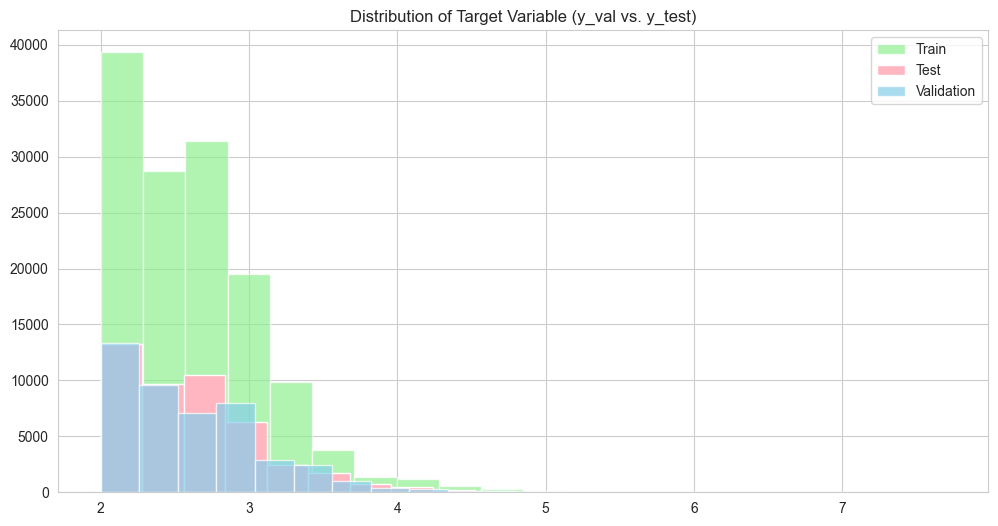

In [57]:
# Compare target distributions
plt.figure(figsize=(12, 6))
plt.hist(y_train, bins=20, alpha=0.7, label="Train", color='lightgreen')
plt.hist(y_test, bins=20, alpha=1, label="Test", color='lightpink')
plt.hist(y_val, bins=20, alpha=0.7, label="Validation", color='skyblue')

plt.legend()
plt.title("Distribution of Target Variable (y_val vs. y_test)")
plt.show()

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Evaluate on validation set
y_val_pred_lr = lr_model.predict(X_val_scaled)
mse_val_lr = mean_squared_error(y_val, y_val_pred_lr)
r2_val_lr = r2_score(y_val, y_val_pred_lr)

print("Linear Regression (Validation):")
print(f"Validation MSE: {mse_val_lr:.4f}")
print(f"Validation R²: {r2_val_lr:.4f}")

Linear Regression (Validation):
Validation MSE: 0.1967
Validation R²: 0.2030


In [59]:
# Evaluate on test set
y_test_pred_lr = lr_model.predict(X_test_scaled)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

print("Linear Regression (Test):")
print(f"Test MSE: {mse_test_lr:.4f}")
print(f"Test R²: {r2_test_lr:.4f}")

Linear Regression (Test):
Test MSE: 0.2013
Test R²: 0.1937


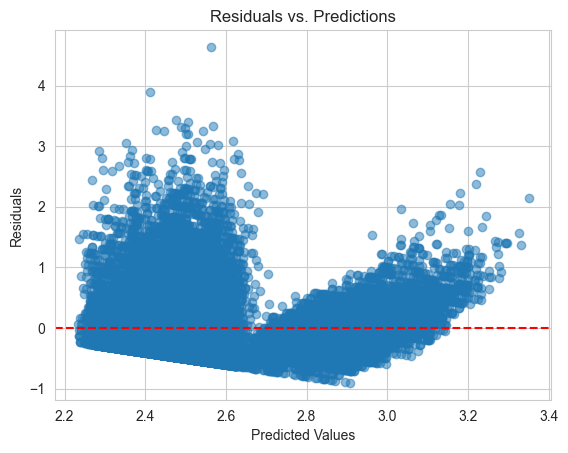

In [60]:
residual_lr = y_val - y_val_pred_lr
plt.scatter(y_val_pred_lr, residual_lr, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Predictions")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In [61]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluate on validation set
y_val_pred_rf = rf_model.predict(X_val_scaled)
mse_val_rf = mean_squared_error(y_val, y_val_pred_rf)
r2_val_rf = r2_score(y_val, y_val_pred_rf)

print("Random Forest Regressor (Validation):")
print(f"Validation MSE: {mse_val_rf:.4f}")
print(f"Validation R²: {r2_val_rf:.4f}")

Random Forest Regressor (Validation):
Validation MSE: 0.1330
Validation R²: 0.4609


In [62]:
# Evaluate on test set
y_test_pred_rf = rf_model.predict(X_test_scaled)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print("Random Forest Regressor (Test):")
print(f"Test MSE: {mse_test_rf:.4f}")
print(f"Test R²: {r2_test_rf:.4f}")

Random Forest Regressor (Test):
Test MSE: 0.1369
Test R²: 0.4515


In [63]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with Random Forest
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Mean Cross-Validation R²:", cv_scores.mean())

Cross-Validation R² Scores: [0.45348207 0.44751004 0.45109371 0.44436779 0.43721213]
Mean Cross-Validation R²: 0.4467331448472097


In [64]:
# Extract feature importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns

# Display feature importance
print("Feature Importances:")
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

Feature Importances:
Latitude: 0.1379
Longtitude: 0.1390
Depth(KM): 0.0991
MD: 0.3001
year: 0.0821
month: 0.0357
day: 0.0727
hour: 0.0726
weekday: 0.0414
Region_encoded: 0.0084
season_encoded: 0.0110


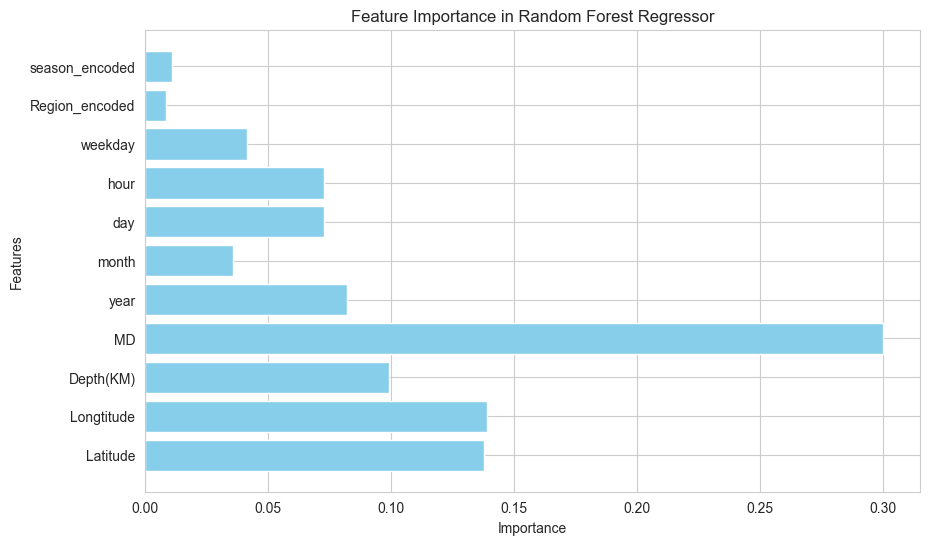

In [65]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.title("Feature Importance in Random Forest Regressor")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [66]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Display the best parameters and the corresponding R² score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation R² Score:", grid_search.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Cross-Validation R² Score: 0.4604416969963743


In [67]:
# Initialize the Random Forest model with the best parameters
best_rf_model = RandomForestRegressor(
    n_estimators=300,
    min_samples_split=10,
    min_samples_leaf=4,
    max_depth=20,
    random_state=42
)

# Train the model on the training set
best_rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=300, random_state=42)

In [68]:
# Evaluate on validation set
y_val_pred = best_rf_model.predict(X_val_scaled)
mse_val_best = mean_squared_error(y_val, y_val_pred)
r2_val_best = r2_score(y_val, y_val_pred)

print("Random Forest Regressor (Validation) After Hypertuning:")
print(f"Validation MSE: {mse_val_best:.4f}")
print(f"Validation R²: {r2_val_best:.4f}")

Random Forest Regressor (Validation) After Hypertuning:
Validation MSE: 0.1290
Validation R²: 0.4771


In [69]:
# Evaluate on test set
y_test_pred = best_rf_model.predict(X_test_scaled)
mse_test_best = mean_squared_error(y_test, y_test_pred)
r2_test_best = r2_score(y_test, y_test_pred)

print("Random Forest Regressor (Test) After Hypertuning:")
print(f"Validation MSE: {mse_test_best:.4f}")
print(f"Validation R²: {r2_test_best:.4f}")

Random Forest Regressor (Test) After Hypertuning:
Validation MSE: 0.1334
Validation R²: 0.4656


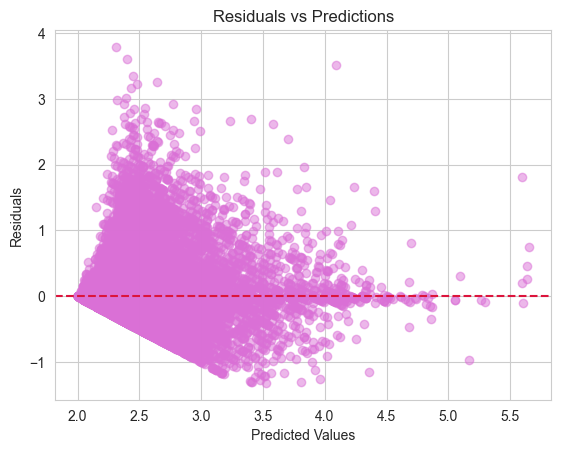

In [70]:
residual_rf = y_test - y_test_pred
plt.scatter(y_test_pred, residual_rf, alpha=0.5, color='orchid')
plt.axhline(0, color='crimson', linestyle='--')
plt.title('Residuals vs Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [71]:
from xgboost import XGBRegressor

# Initialize and train XGBoost model
xgb_model = XGBRegressor(random_state=42, n_estimators=200, max_depth=6, learning_rate=0.1)
xgb_model.fit(X_train_scaled, y_train)

# Evaluate on validation set
y_val_pred_xgb = xgb_model.predict(X_val_scaled)
mse_val_xgb = mean_squared_error(y_val, y_val_pred_xgb)
r2_val_xgb = r2_score(y_val, y_val_pred_xgb)

print("XGBoost (Validation):")
print(f"Validation MSE: {mse_val_xgb:.4f}")
print(f"Validation R²: {r2_val_xgb:.4f}")

XGBoost (Validation):
Validation MSE: 0.1308
Validation R²: 0.4698


In [72]:
# Evaluate on test set
y_test_pred_xgb = xgb_model.predict(X_test_scaled)
mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

print("XGBoost (Test):")
print(f"Test MSE: {mse_test_xgb:.4f}")
print(f"Test R²: {r2_test_xgb:.4f}")

XGBoost (Test):
Test MSE: 0.1351
Test R²: 0.4589


In [76]:
from sklearn.model_selection import RandomizedSearchCV
# Initialize the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid for random search
param_distributions = {
    'n_estimators': [100, 200, 300, 500],              # Number of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],           # Step size shrinkage
    'max_depth': [3, 5, 7, 10],                        # Maximum depth of a tree
    'subsample': [0.6, 0.8, 1.0],                     # Fraction of samples used for training
    'colsample_bytree': [0.6, 0.8, 1.0],              # Fraction of features used per tree
    'reg_alpha': [0, 0.01, 0.1, 1],                   # L1 regularization strength
    'reg_lambda': [1, 1.5, 2, 3],                     # L2 regularization strength
    'gamma': [0, 0.1, 0.2, 0.3]                       # Minimum loss reduction required to make a split
}

# Perform Randomized Search with 3-fold cross-validation
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=20,              # Number of random parameter combinations to try
    scoring='r2',           # Use R² as the evaluation metric
    cv=3,                   # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1               # Use all available cores
)

# Fit the random search
random_search_xgb.fit(X_train_scaled, y_train)

# Display the best parameters and the corresponding R² score
print("Best Parameters:", random_search_xgb.best_params_)
print("Best Cross-Validation R² Score:", random_search_xgb.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best Cross-Validation R² Score: 0.46066683998208435


In [77]:
best_xgb_model = random_search_xgb.best_estimator_
y_test_pred_xgb = best_xgb_model.predict(X_test_scaled)

mse_test_xgb_best = mean_squared_error(y_test, y_test_pred_xgb)
r2_test_xgb_best = r2_score(y_test, y_test_pred_xgb)

print("XGBoost (Test):")
print(f"Test MSE: {mse_test_xgb_best:.4f}")
print(f"Test R²: {r2_test_xgb_best:.4f}")

XGBoost (Test):
Test MSE: 0.1335
Test R²: 0.4650


In [78]:
# Predict on the validation set (from the train-validation split)
y_val_pred_xgb = best_xgb_model.predict(X_val_scaled)

# Evaluate the tuned model on the validation set
mse_val_xgb_best = mean_squared_error(y_val, y_val_pred_xgb)
r2_val_xgb_best = r2_score(y_val, y_val_pred_xgb)

print("XGBoost (Validation):")
print(f"Validation MSE: {mse_val_xgb_best:.4f}")
print(f"Validation R²: {r2_val_xgb_best:.4f}")

XGBoost (Validation):
Validation MSE: 0.1290
Validation R²: 0.4774


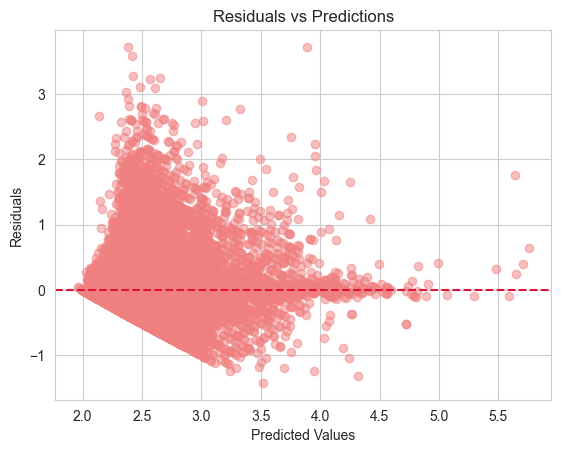

In [79]:
residual_xgb = y_test - y_test_pred_xgb
plt.scatter(y_test_pred_xgb, residual_xgb, alpha=0.5, color='lightcoral')
plt.axhline(0, color='crimson', linestyle='--')
plt.title('Residuals vs Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [80]:
# Dynamically determine the best model for each metric
def find_best_model(row):
    if "MSE" in row.name:  # For MSE, lower is better
        return row.idxmin()
    elif "R²" in row.name:  # For R², higher is better
        return row.idxmax()

In [81]:
# Use your pre-existing variables
data = {
    "Metric": ["Validation MSE", "Validation R²", "Test MSE", "Test R²"],
    "Linear Regression": [mse_val_lr, r2_val_lr, mse_test_lr, r2_test_lr],
    "Random Forest (Tuned)": [mse_val_best, r2_val_best, mse_test_best, r2_test_best],
    "XGBoost (Tuned)": [mse_val_xgb_best, r2_val_xgb_best, mse_test_xgb_best, r2_test_xgb_best]
}

# Create the DataFrame
comparison_df = pd.DataFrame(data)

# Set the Metric column as the index
comparison_df.set_index("Metric", inplace=True)

# Add the "Best Model" column
comparison_df["Best Model"] = comparison_df.apply(find_best_model, axis=1)

# Display the table
comparison_df

Linear Regression  Random Forest (Tuned)  XGBoost (Tuned)  \
Metric                                                                      
Validation MSE           0.196681               0.129029         0.128976   
Validation R²            0.202994               0.477139         0.477351   
Test MSE                 0.201275               0.133387         0.133541   
Test R²                  0.193666               0.465633         0.465018   

                           Best Model  
Metric                                 
Validation MSE        XGBoost (Tuned)  
Validation R²         XGBoost (Tuned)  
Test MSE        Random Forest (Tuned)  
Test R²         Random Forest (Tuned)

In [82]:
import joblib

# Save the model
joblib.dump(best_xgb_model, 'final_xgb_model.pkl')

# Load the model later for predictions
# model = joblib.load('final_xgb_model.pkl')

['final_xgb_model.pkl']

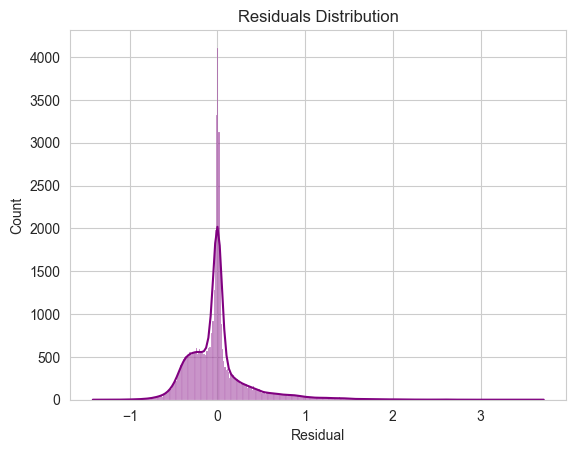

In [83]:
sns.histplot(residual_xgb, kde=True, color='purple')
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.show()

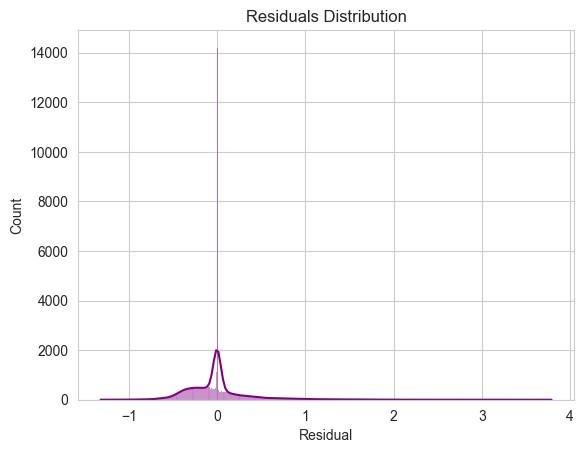

In [84]:
sns.histplot(residual_rf, kde=True, color='purple')
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.show()

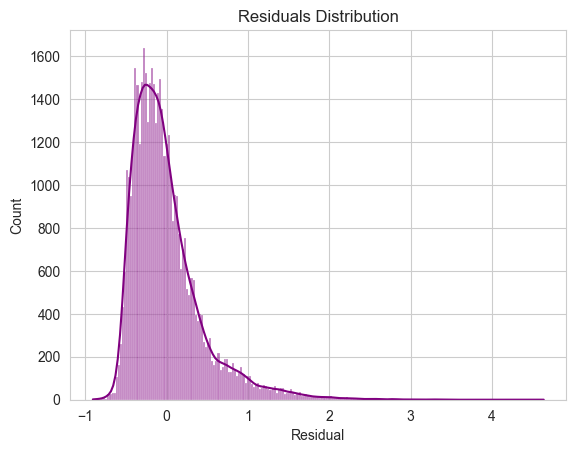

In [90]:
sns.histplot(residual_lr, kde=True, color='purple')
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.show()

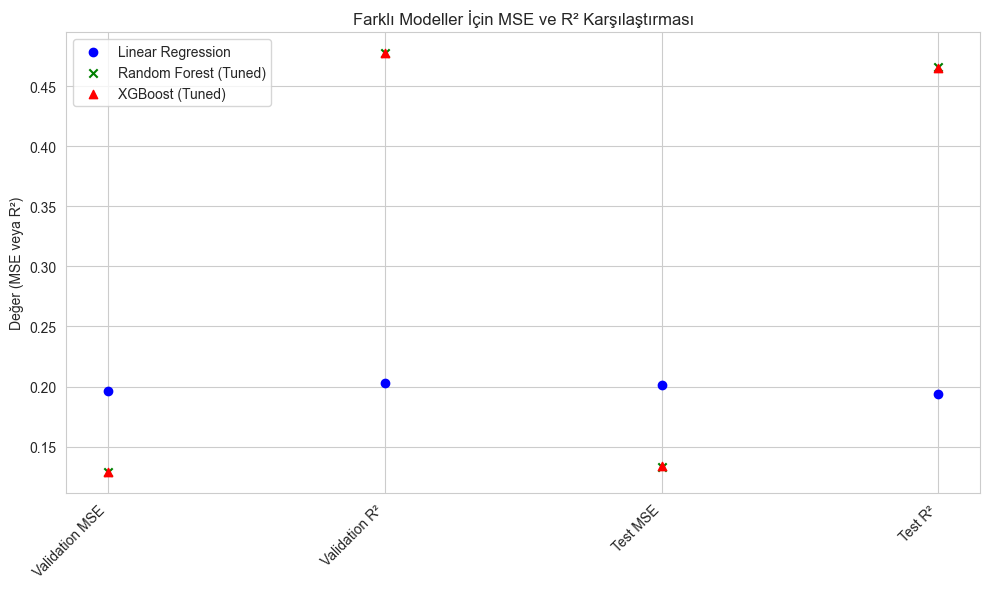

In [102]:
import matplotlib.pyplot as plt

# Elinizdeki metrik ve değerler
metrics = ["Validation MSE", "Validation R²", "Test MSE", "Test R²"]

# X eksenindeki konumlar (her metrik için bir index)
x = range(len(metrics))  # [0, 1, 2, 3]

# Sözlüğünüzdeki değerleri ayrı ayrı listeler haline getiriyoruz
lr_vals = [
    mse_val_lr,       # Validation MSE (LR)
    r2_val_lr,        # Validation R² (LR)
    mse_test_lr,      # Test MSE (LR)
    r2_test_lr        # Test R² (LR)
]

rf_vals = [
    mse_val_best,     # Validation MSE (RF Tuned)
    r2_val_best,      # Validation R² (RF Tuned)
    mse_test_best,    # Test MSE (RF Tuned)
    r2_test_best      # Test R² (RF Tuned)
]

xgb_vals = [
    mse_val_xgb_best,     # Validation MSE (XGBoost Tuned)
    r2_val_xgb_best,      # Validation R² (XGBoost Tuned)
    mse_test_xgb_best,    # Test MSE (XGBoost Tuned)
    r2_test_xgb_best      # Test R² (XGBoost Tuned)
]

plt.figure(figsize=(10, 6))

# Her modelin metrik değerlerini scatter (nokta) şeklinde çiziyoruz
plt.scatter(x, lr_vals, label="Linear Regression", color='blue', marker='o')
plt.scatter(x, rf_vals, label="Random Forest (Tuned)", color='green', marker='x')
plt.scatter(x, xgb_vals, label="XGBoost (Tuned)", color='red', marker='^')

# x eksenine metrik isimlerini yazıyoruz
plt.xticks(ticks=x, labels=metrics, rotation=45, ha='right')  
plt.ylabel("Değer (MSE veya R²)")
plt.title("Farklı Modeller İçin MSE ve R² Karşılaştırması")
plt.legend()
plt.tight_layout()
plt.show()


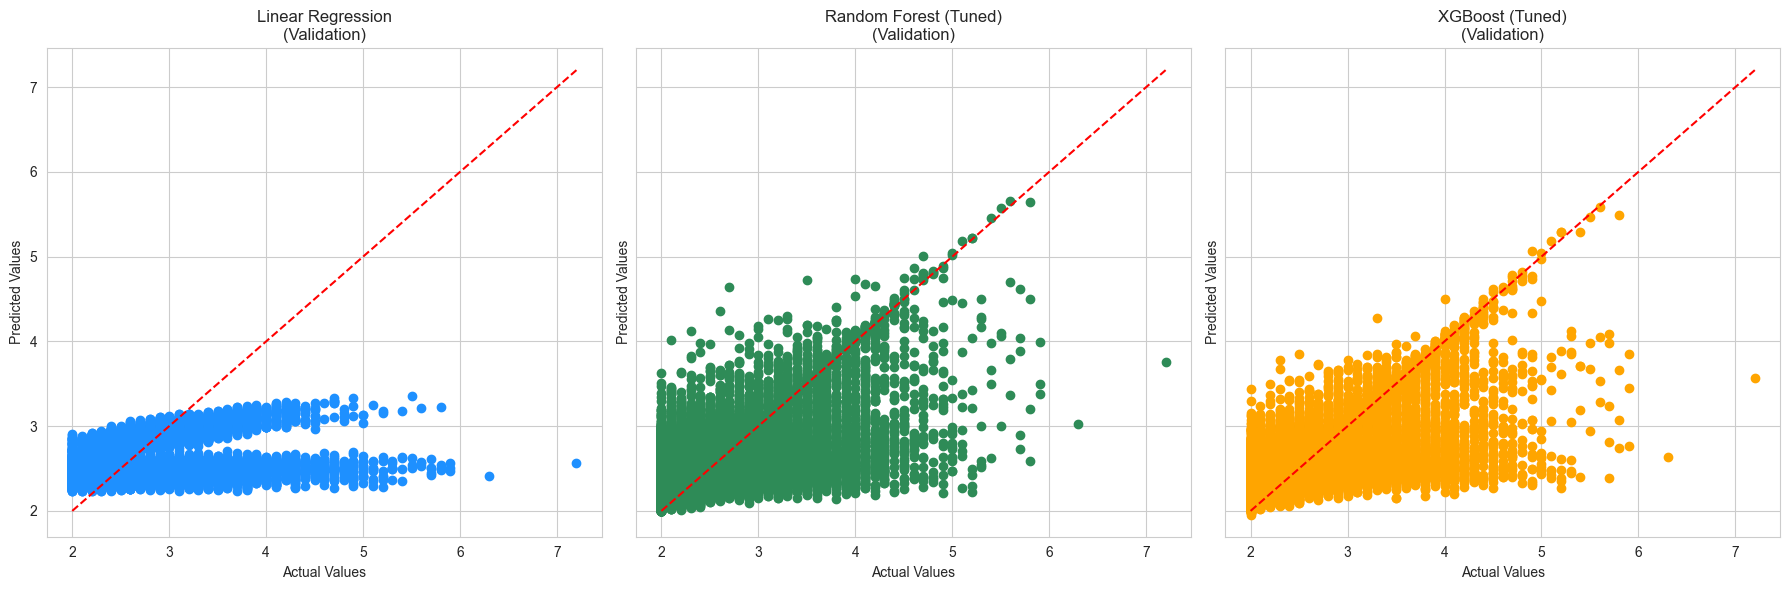

In [104]:
import matplotlib.pyplot as plt

# 1 satır, 3 sütun olacak şekilde subplotlar oluşturuyoruz
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Linear Regression
axs[0].scatter(y_val, y_val_pred_lr, alpha=1, color='dodgerblue')
# y=x doğrusunu ekleyerek ideal durumu referans alıyoruz
axs[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
axs[0].set_title('Linear Regression\n(Validation)')
axs[0].set_xlabel('Actual Values')
axs[0].set_ylabel('Predicted Values')

# Random Forest (Tuned)
axs[1].scatter(y_val, y_val_pred_rf, alpha=1, color='seagreen')
axs[1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
axs[1].set_title('Random Forest (Tuned)\n(Validation)')
axs[1].set_xlabel('Actual Values')
axs[1].set_ylabel('Predicted Values')

# XGBoost (Tuned)
axs[2].scatter(y_val, y_val_pred_xgb, alpha=1, color='orange')
axs[2].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
axs[2].set_title('XGBoost (Tuned)\n(Validation)')
axs[2].set_xlabel('Actual Values')
axs[2].set_ylabel('Predicted Values')

plt.tight_layout()
plt.show()


#### 3 MODEL YETERSİZ GÖRDÜK xM TAHMİNLEME İÇİN NEURAL NETWORK DENEYECEĞİZ

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [120]:
# Step 1: Select Features and Target
features = ['Latitude', 'Longtitude', 'Depth(KM)', 'MD', 'year', 'month', 'day', 'hour', 'weekday', 'Region_encoded', 'season_encoded']
target = 'xM'

# Filter the dataset
X = df[features]
y = df[target]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=0.25,       # 0.25 * 80% = 20%
    random_state=42
)

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:", X_val.shape,     "y_val:", y_val.shape)
print("X_test:", X_test.shape,   "y_test:", y_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # Sadece train setiyle fit ediyoruz
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

print("X_train_scaled:", X_train_scaled.shape)
print("X_val_scaled:", X_val_scaled.shape)
print("X_test_scaled:", X_test_scaled.shape)


In [134]:
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping

###########################################
# 1) Hiperparametreli Modeli Tanımlayan Fonksiyon
###########################################
def build_model(hp):
    """
    Keras Tuner'in deneyeceği parametreleri burada belirliyoruz.
    Örneğin:
      - Katman sayısı (loop içinde),
      - Her katmandaki nöron sayısı,
      - Dropout oranı,
      - Learning Rate vb.
    """
    model = Sequential()
    
    # Giriş boyutunu yine X_train_scaled.shape[1] üzerinden ayarlayalım
    model.add(Input(shape=(X_train_scaled.shape[1],)))
    
    # Kaç katman (1-3 arası) denensin?
    for i in range(hp.Int("num_layers", 1, 3)):  
        # Her katmandaki nöron sayısını 32-256 aralığında 32'şer adım artarak tarıyoruz
        units = hp.Int(f"units_{i}", min_value=32, max_value=256, step=32)
        model.add(Dense(
            units,
            activation='relu',
            # L2 düzenlileştirme: 0.0 veya 0.001 denensin
            kernel_regularizer=tf.keras.regularizers.l2(
                hp.Choice('l2_reg', [0.0, 0.001])
            )
        ))
        
        # Dropout oranı: 0.0, 0.2 veya 0.5
        model.add(Dropout(
            hp.Choice('dropout', values=[0.0, 0.2, 0.5])
        ))
    
    # Çıkış katmanı
    model.add(Dense(1, activation='linear'))
    
    # Learning rate (optimizer) için birkaç seçeneğimiz:
    lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae', 'mse']
    )
    return model

###########################################
# 2) Tuner Nesnesini Tanımlama
###########################################
# Burada RandomSearch (rastgele) ile 5 farklı kombinasyonu (max_trials=5) deneyeceğiz.
# Her trial 1 kez çalışsın (executions_per_trial=1). Metrik olarak val_loss'a bakıyoruz.
# Siz max_trials'ı 10, 20 gibi artırarak daha fazla kombinasyon deneyebilirsiniz.

tuner = kt.RandomSearch(
    build_model,
    objective="val_loss",       # Hangi metriğe göre "en iyi" belirlensin?
    max_trials=5,              # Kaç farklı hiperparametre seti denensin
    executions_per_trial=1,    # Her seti kaç defa eğitip ortalama alalım
    overwrite=True,            # Aynı isimli proje klasörü varsa üzerine yaz
    directory="my_tuner_dir",  # Sonuçların kaydedileceği klasör
    project_name="nn_tuning"    # Proje ismi
)

###########################################
# 3) Tuner Aramasını Başlat
###########################################
# Erken durdurma ekleyerek 50 epoch içinde gelişme durursa modeli kaydetmeyi durdurabiliriz
early_stop = EarlyStopping(
    monitor='val_loss', 
    mode='min', 
    patience=5, 
    restore_best_weights=True
)

# Tuner aramasını yaparken de train/val setini kullanıyoruz
tuner.search(
    X_train_scaled, y_train,
    epochs=50,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stop],
    verbose=1
)

###########################################
# 4) En İyi Hiperparametreleri Al ve Modeli Kur
###########################################
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("En İyi Hiperparametreler:", best_hp.values)

best_model = tuner.hypermodel.build(best_hp)
best_model.summary()

###########################################
# 5) Seçilen En İyi Modeli Eğit
###########################################
# Tekrar fit edip (epok sayısını arttırabilirsiniz), early stopping ekleyebilirsiniz
history_best = best_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)

###########################################
# 6) Değerlendirme (Validation / Test)
###########################################
y_val_pred_best  = best_model.predict(X_val_scaled)
mse_val_best     = mean_squared_error(y_val, y_val_pred_best)
r2_val_best      = r2_score(y_val, y_val_pred_best)

print("Best Tuned NN (Validation):")
print(f"MSE : {mse_val_best:.4f}")
print(f"R^2 : {r2_val_best:.4f}")

y_test_pred_best = best_model.predict(X_test_scaled)
mse_test_best    = mean_squared_error(y_test, y_test_pred_best)
r2_test_best     = r2_score(y_test, y_test_pred_best)

print("\nBest Tuned NN (Test):")
print(f"MSE : {mse_test_best:.4f}")
print(f"R^2 : {r2_test_best:.4f}")


Trial 5 Complete [00h 01m 59s]
val_loss: 0.16103495657444

Best val_loss So Far: 0.14098720252513885
Total elapsed time: 00h 15m 32s
En İyi Hiperparametreler: {'num_layers': 2, 'units_0': 192, 'l2_reg': 0.0, 'dropout': 0.0, 'learning_rate': 0.0001, 'units_1': 32}


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 192)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,513 (33.25 KB)

 Trainable params: 8,513 (33.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.5030 - mae: 1.3031 - mse: 2.5030 - val_loss: 0.2774 - val_mae: 0.3941 - val_mse: 0.2774
Epoch 2/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2684 - mae: 0.3846 - mse: 0.2684 - val_loss: 0.2342 - val_mae: 0.3557 - val_mse: 0.2342
Epoch 3/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2274 - mae: 0.3479 - mse: 0.2274 - val_loss: 0.2101 - val_mae: 0.3296 - val_mse: 0.2101
Epoch 4/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2065 - mae: 0.3264 - mse: 0.2065 - val_loss: 0.1917 - val_mae: 0.3100 - val_mse: 0.1917
Epoch 5/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1883 - mae: 0.3055 - mse: 0.1883 - val_loss: 0.1776 - val_mae: 0.2909 - val_mse: 0.1776
Epoch 6/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1762 - mae: 0.2881 - mse: 0.1762 - val_loss: 0.1681 - val_mae: 0.2743 - val_mse: 0.1681
Epoch 7/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1678 - mae: 0.2737 - mse: 0.1678 - val

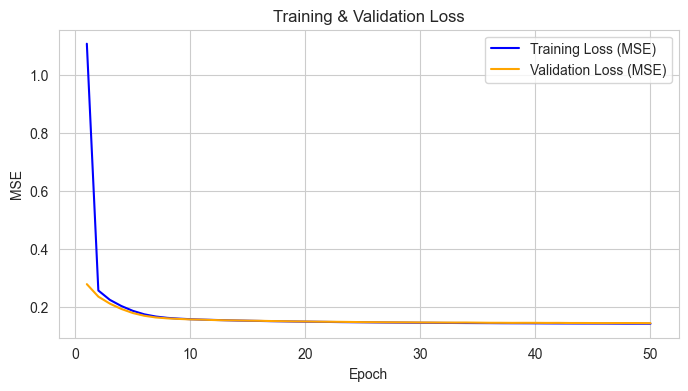

In [135]:
import matplotlib.pyplot as plt

train_loss = history_best.history['loss']
val_loss   = history_best.history['val_loss']
epochs_ran = range(1, len(train_loss)+1)

plt.figure(figsize=(8, 4))
plt.plot(epochs_ran, train_loss, label='Training Loss (MSE)', color='blue')
plt.plot(epochs_ran, val_loss,   label='Validation Loss (MSE)', color='orange')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()


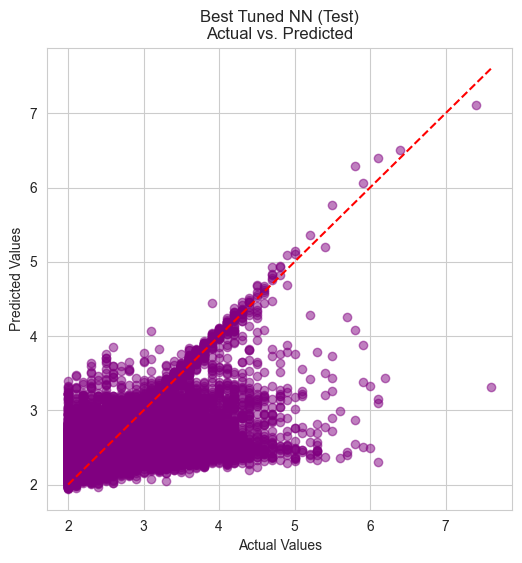

In [136]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred_best, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Best Tuned NN (Test)\nActual vs. Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


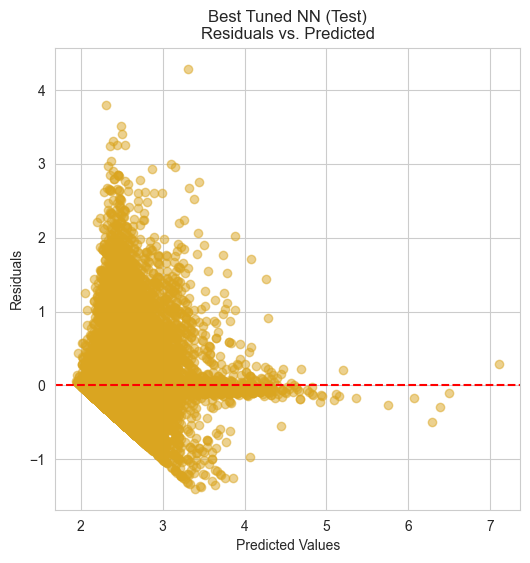

In [137]:
residuals = y_test - y_test_pred_best.reshape(-1)

plt.figure(figsize=(6, 6))
plt.scatter(y_test_pred_best, residuals, alpha=0.5, color='goldenrod')
plt.axhline(0, color='red', linestyle='--')
plt.title("Best Tuned NN (Test)\nResiduals vs. Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


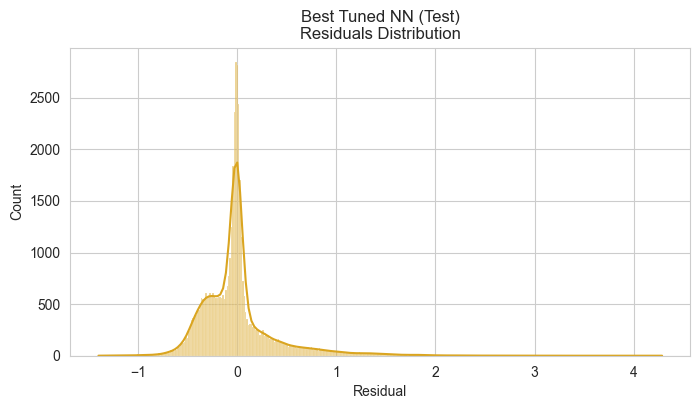

In [138]:
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, color='goldenrod')
plt.title("Best Tuned NN (Test)\nResiduals Distribution")
plt.xlabel("Residual")
plt.show()


#### FARKLI BİR NEURAL NETWORK MODELİ DAHA EĞİTELİM

In [139]:
# Giriş boyutunu dinamik olarak almak için
input_dim = X_train_scaled.shape[1]

model = Sequential()

# 1. Gizli Katman
model.add(Dense(64, activation='relu', input_shape=(input_dim,)))
# Overfitting'i önlemek için Dropout (örnek: %20)
model.add(Dropout(0.2))

# 2. Gizli Katman
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Çıkış Katmanı
model.add(Dense(1, activation='linear'))

# Modeli derliyoruz
model.compile(
    optimizer='adam',          # Adam genellikle iyi bir başlangıç optimizer'ıdır
    loss='mse',                # Regresyon problemlerinde 'mse' (Mean Squared Error) kullanılabilir
    metrics=['mae', 'mse']     # Hata analizi için ek metrikler
)

# Modelin özeti
model.summary()



early_stop = EarlyStopping(
    monitor='val_loss',   # Doğrulama setindeki (val) loss'unu izliyoruz
    mode='min',           # Loss mümkün olduğunca azalsın
    patience=5,           # 5 epoch boyunca iyileşme görülmezse dur
    restore_best_weights=True  # Durdurduğu anda en iyi ağırlıkları geri yükle
)


history = model.fit(
    X_train_scaled, 
    y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)




C:\Users\Batuhan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.3338 - mae: 0.8647 - mse: 1.3338 - val_loss: 0.1934 - val_mae: 0.3030 - val_mse: 0.1934
Epoch 2/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3406 - mae: 0.4433 - mse: 0.3406 - val_loss: 0.1729 - val_mae: 0.2705 - val_mse: 0.1729
Epoch 3/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2922 - mae: 0.4063 - mse: 0.2922 - val_loss: 0.1671 - val_mae: 0.2707 - val_mse: 0.1671
Epoch 4/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2602 - mae: 0.3791 - mse: 0.2602 - val_loss: 0.1673 - val_mae: 0.2833 - val_mse: 0.1673
Epoch 5/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2456 - mae: 0.3662 - mse: 0.2456 - val_loss: 0.1663 - val_mae: 0.2726 - val_mse: 0.1663
Epoch 6/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2334 - mae: 0.3543 - mse: 0.2334 - val_loss: 0.1627 - val_mae: 0.2689 - val_mse: 0.1627
Epoch 7/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2155 - mae: 0.3381 - mse: 0.2155 - val

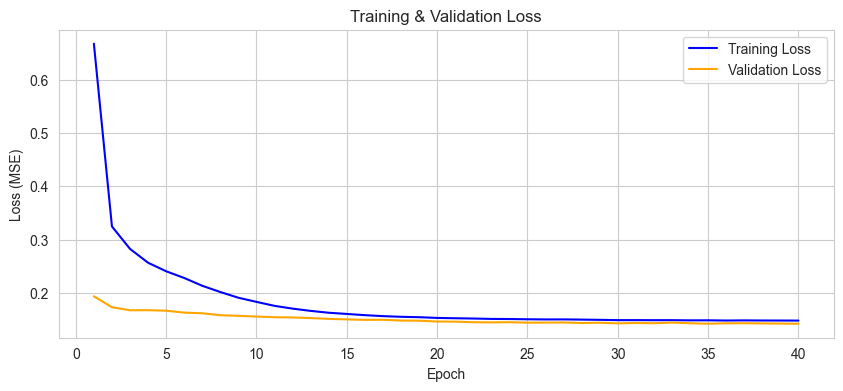

In [140]:
plt.figure(figsize=(10, 4))

# MSE veya MAE de grafiğe eklenebilir, örnek: 'mse'
train_loss = history.history['loss']
val_loss   = history.history['val_loss']

epochs_ran = range(1, len(train_loss) + 1)

plt.plot(epochs_ran, train_loss, label='Training Loss', color='blue')
plt.plot(epochs_ran, val_loss, label='Validation Loss', color='orange')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


In [141]:
# Tahmin
y_val_pred_nn = model.predict(X_val_scaled)

# Metrikler
mse_val_nn = mean_squared_error(y_val, y_val_pred_nn)
r2_val_nn  = r2_score(y_val, y_val_pred_nn)

print("Neural Network (Validation):")
print(f"MSE : {mse_val_nn:.4f}")
print(f"R^2 : {r2_val_nn:.4f}")



y_test_pred_nn = model.predict(X_test_scaled)

mse_test_nn = mean_squared_error(y_test, y_test_pred_nn)
r2_test_nn  = r2_score(y_test, y_test_pred_nn)

print("\nNeural Network (Test):")
print(f"MSE : {mse_test_nn:.4f}")
print(f"R^2 : {r2_test_nn:.4f}")


1420/1420 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step
Neural Network (Validation):
MSE : 0.1419
R^2 : 0.4251
1420/1420 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step

Neural Network (Test):
MSE : 0.1463
R^2 : 0.4141


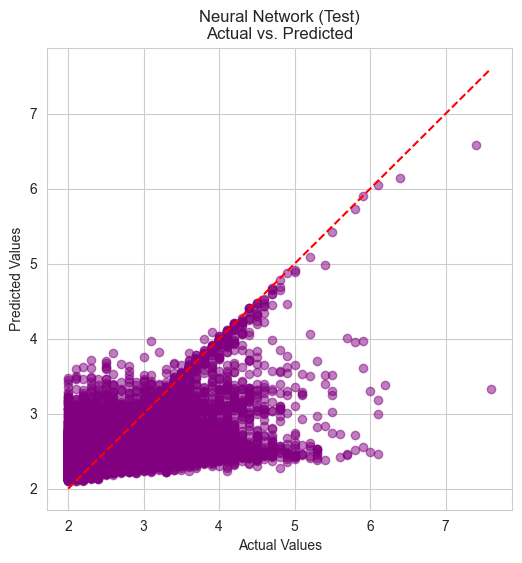

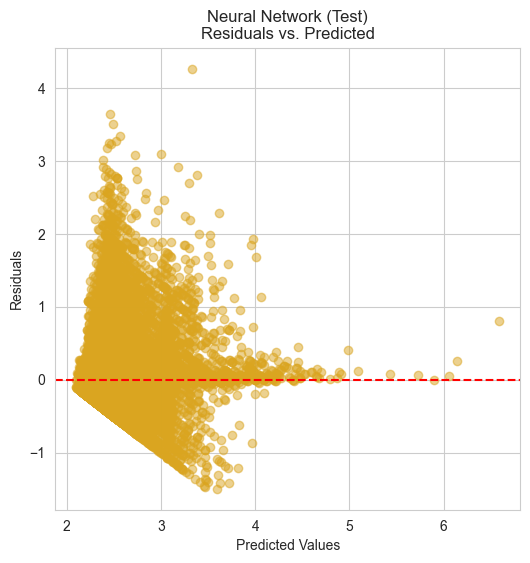

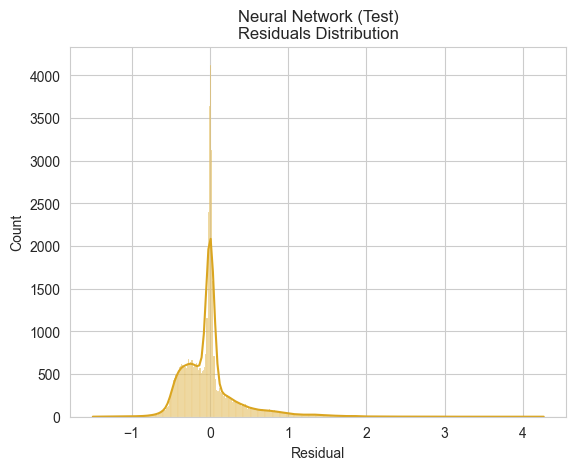

In [142]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred_nn, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Neural Network (Test)\nActual vs. Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


residual_nn_test = y_test - y_test_pred_nn.reshape(-1)  # y_test_pred_nn 2D dönebilir, bu yüzden reshape

# 8.1 Residual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test_pred_nn, residual_nn_test, alpha=0.5, color='goldenrod')
plt.axhline(0, color='red', linestyle='--')
plt.title("Neural Network (Test)\nResiduals vs. Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# 8.2 Residual Distribution
sns.histplot(residual_nn_test, kde=True, color='goldenrod')
plt.title("Neural Network (Test)\nResiduals Distribution")
plt.xlabel("Residual")
plt.show()




#### HER ŞEYE BAKILDIĞINDA EN İYİ MODELİN XGBOOST OLDUĞU GÖRÜLMÜŞTÜR

## 3.2 REGION

In [144]:
# Step 1: Select Features and Target
features = ['Latitude', 'Longtitude', 'Depth(KM)', 'MD', 'year', 'month', 'day', 'hour', 'weekday', 'xM', 'season_encoded']
target = 'Region_encoded'

# Filter the dataset
X = df[features]
y = df[target]

In [145]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # sınıflar orantılı dağılsın istiyorsanız
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=0.25,  # 0.25 x 80% = 20%
    random_state=42,
    stratify=y_train_val
)

print("Train:", X_train.shape, y_train.shape)
print("Val:",   X_val.shape,   y_val.shape)
print("Test:",  X_test.shape,  y_test.shape)


Train: (136279, 11) (136279,)
Val: (45427, 11) (45427,)
Test: (45427, 11) (45427,)


In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# 2.1 Modeli Oluşturma
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# 2.2 Tahmin (Validation)
y_val_pred_rf = rf_clf.predict(X_val)
acc_val_rf = accuracy_score(y_val, y_val_pred_rf)
f1_val_rf  = f1_score(y_val, y_val_pred_rf, average='weighted')  # çoklu sınıfta 'weighted' ortalama

# 2.3 Tahmin (Test)
y_test_pred_rf = rf_clf.predict(X_test)
acc_test_rf = accuracy_score(y_test, y_test_pred_rf)
f1_test_rf  = f1_score(y_test, y_test_pred_rf, average='weighted')

print("Random Forest (Validation) -> Acc: {:.4f}, F1: {:.4f}".format(acc_val_rf, f1_val_rf))
print("Random Forest (Test)       -> Acc: {:.4f}, F1: {:.4f}".format(acc_test_rf, f1_test_rf))


Random Forest (Validation) -> Acc: 0.9631, F1: 0.9629
Random Forest (Test)       -> Acc: 0.9650, F1: 0.9648


In [155]:
# 3.1 Modeli Oluşturma
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

# 3.2 Validation
y_val_pred_xgb = xgb_clf.predict(X_val)
acc_val_xgb = accuracy_score(y_val, y_val_pred_xgb)
f1_val_xgb  = f1_score(y_val, y_val_pred_xgb, average='weighted')

# 3.3 Test
y_test_pred_xgb = xgb_clf.predict(X_test)
acc_test_xgb = accuracy_score(y_test, y_test_pred_xgb)
f1_test_xgb  = f1_score(y_test, y_test_pred_xgb, average='weighted')

print("XGBoost (Validation) -> Acc: {:.4f}, F1: {:.4f}".format(acc_val_xgb, f1_val_xgb))
print("XGBoost (Test)       -> Acc: {:.4f}, F1: {:.4f}".format(acc_test_xgb, f1_test_xgb))


XGBoost (Validation) -> Acc: 0.9804, F1: 0.9804
XGBoost (Test)       -> Acc: 0.9793, F1: 0.9794


In [156]:
# 4.1 MLP Modeli Tanımlama
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))  # Kaç sınıf varsa o kadar nöron

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 4.2 Early Stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=5,
    restore_best_weights=True
)

# 4.3 Modeli Eğitme
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)

# 4.4 Performans
# Validation set
val_loss_nn, val_acc_nn = model.evaluate(X_val, y_val, verbose=0)
y_val_pred_nn = model.predict(X_val).argmax(axis=1)  # En yüksek olasılık = tahmin sınıfı
f1_val_nn     = f1_score(y_val, y_val_pred_nn, average='weighted')

# Test set
test_loss_nn, test_acc_nn = model.evaluate(X_test, y_test, verbose=0)
y_test_pred_nn = model.predict(X_test).argmax(axis=1)
f1_test_nn     = f1_score(y_test, y_test_pred_nn, average='weighted')

print("Neural Net (Validation) -> Acc: {:.4f}, F1: {:.4f}".format(val_acc_nn, f1_val_nn))
print("Neural Net (Test)       -> Acc: {:.4f}, F1: {:.4f}".format(test_acc_nn, f1_test_nn))


Epoch 1/50


C:\Users\Batuhan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


533/533 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2186 - loss: 46.1335 - val_accuracy: 0.3060 - val_loss: 1.7657
Epoch 2/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3069 - loss: 1.8171 - val_accuracy: 0.3060 - val_loss: 1.7195
Epoch 3/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3049 - loss: 1.7391 - val_accuracy: 0.3060 - val_loss: 1.7100
Epoch 4/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3053 - loss: 1.7178 - val_accuracy: 0.3060 - val_loss: 1.7081
Epoch 5/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3066 - loss: 1.7109 - val_accuracy: 0.3060 - val_loss: 1.7077
Epoch 6/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3043 - loss: 1.7129 - val_accuracy: 0.3060 - val_loss: 1.7077
Epoch 7/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3057 - loss: 1.7137 - val_accuracy: 0.3060 - val_loss: 1.7077
Epoch 8/50
533/533 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3042 - loss: 1.7123 - val_accuracy: 0.3060 - val

In [163]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# 1.1 Modeli Oluşturma
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)  # y_train: Region_encoded (ör. 0,1,2,3...)

# 1.2 Validation Set Tahminleri
y_val_pred_float = lr_model.predict(X_val)  
# Tahminler genelde float olacaktır, bunları en yakın tam sayıya yuvarlayarak sınıfa dönüştürelim
y_val_pred_lr = np.rint(y_val_pred_float).astype(int)

acc_val_lr = accuracy_score(y_val, y_val_pred_lr)
f1_val_lr  = f1_score(y_val, y_val_pred_lr, average='weighted')

print("Linear Regression (Validation):")
print("Accuracy:", acc_val_lr)
print("F1 Score:", f1_val_lr)
print("Classification Report:\n", classification_report(y_val, y_val_pred_lr, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_lr))

# 1.3 Test Set Tahminleri
y_test_pred_float = lr_model.predict(X_test)
y_test_pred_lr = np.rint(y_test_pred_float).astype(int)

acc_test_lr = accuracy_score(y_test, y_test_pred_lr)
f1_test_lr  = f1_score(y_test, y_test_pred_lr, average='weighted')

print("\nLinear Regression (Test):")
print("Accuracy:", acc_test_lr)
print("F1 Score:", f1_test_lr)


Linear Regression (Validation):
Accuracy: 0.2994474651638893
F1 Score: 0.3300036602281291
Classification Report:
               precision    recall  f1-score   support

          -2       0.00      0.00      0.00         0
          -1       0.00      0.00      0.00         0
           0       0.82      0.30      0.44     10920
           1       0.27      0.44      0.33      8876
           2       0.44      0.31      0.36     13899
           3       0.00      0.00      0.00      1717
           4       0.20      0.61      0.30      1904
           5       0.75      0.21      0.33      4967
           6       0.00      0.00      0.00      3144

    accuracy                           0.30     45427
   macro avg       0.28      0.21      0.20     45427
weighted avg       0.48      0.30      0.33     45427

Confusion Matrix:
 [[   0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0]
 [   0  400 3232 6681  601    1    5    0    0]
 [   0    1   83 3

In [164]:
comparison_data = {
    "Metric": ["Validation Accuracy", "Validation F1", "Test Accuracy", "Test F1"],
    "Linear Regression": [acc_val_lr, f1_val_lr, acc_test_lr, f1_test_lr],
    "Random Forest":     [acc_val_rf, f1_val_rf, acc_test_rf, f1_test_rf],
    "XGBoost":           [acc_val_xgb, f1_val_xgb, acc_test_xgb, f1_test_xgb],
    "Neural Network":    [val_acc_nn, f1_val_nn, test_acc_nn, f1_test_nn],
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df.set_index("Metric", inplace=True)
comparison_df


Linear Regression  Random Forest   XGBoost  \
Metric                                                            
Validation Accuracy           0.299447       0.963128  0.980364   
Validation F1                 0.330004       0.962891  0.980390   
Test Accuracy                 0.297268       0.964955  0.979329   
Test F1                       0.327408       0.964775  0.979355   

                     Neural Network  
Metric                               
Validation Accuracy        0.305963  
Validation F1              0.143363  
Test Accuracy              0.305963  
Test F1                    0.143363

In [165]:
val_acc_row = comparison_df.loc["Validation Accuracy"]
best_model_name = val_acc_row.idxmax()  # En yüksek Acc olan kolonun ismi
print("Best Model by Validation Accuracy:", best_model_name)

Best Model by Validation Accuracy: XGBoost


In [167]:
print("Classification Report (XGBoost - Val):\n", 
      classification_report(y_val, y_val_pred_xgb))


Classification Report (XGBoost - Val):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     10920
           1       0.98      0.98      0.98      8876
           2       0.99      0.98      0.99     13899
           3       0.92      0.95      0.93      1717
           4       0.95      0.95      0.95      1904
           5       0.99      0.99      0.99      4967
           6       0.98      0.97      0.97      3144

    accuracy                           0.98     45427
   macro avg       0.97      0.97      0.97     45427
weighted avg       0.98      0.98      0.98     45427

